In [1]:
# faceMask study 2 hDDM drift rate analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/30/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import hddm
print(hddm.__version__) # should be 0.6.0

from patsy import dmatrix

1.11.3
0.6.0


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

subj_idx  block  faceList emotionRating  trial             stimulus  \
0  lbmmswtrr0mpvov      0         3     surprised      0  _faces/HM08_F_X.jpg   
1  lbmmswtrr0mpvov      0         3     surprised      1  _faces/BM17_R_X.jpg   
2  lbmmswtrr0mpvov      0         3     surprised      2  _faces/WF05_S_X.jpg   
3  lbmmswtrr0mpvov      0         3     surprised      3  _faces/BM17_R_L.jpg   
4  lbmmswtrr0mpvov      0         3     surprised      4  _faces/BF10_D_X.jpg   
5  lbmmswtrr0mpvov      0         3     surprised      5  _faces/BF15_F_L.jpg   
6  lbmmswtrr0mpvov      0         3     surprised      6  _faces/AM07_S_X.jpg   
7  lbmmswtrr0mpvov      0         3     surprised      7  _faces/BF10_D_L.jpg   
8  lbmmswtrr0mpvov      0         3     surprised      8  _faces/AM07_S_U.jpg   
9  lbmmswtrr0mpvov      0         3     surprised      9  _faces/BM16_H_U.jpg   

       face model ethnicity sex expression      mask  response        rt  \
0  HM08_F_X  HM08         H   M    fearful  baseline         1  2.248290   
1  BM17_R_X  BM17         B   M  surprised  baseline         1  1.122130   
2  WF05_S_X  WF05         W   F        sad  baseline         0 -1.093135   
3  BM17_R_L  BM17         B   M  surprised     lower         1  1.347000   
4  BF10_D_X  BF10         B   F  disgusted  baseline         0 -1.586875   
5  BF15_F_L  BF15         B   F    fearful     lower         1  1.020070   
6  AM07_S_X  AM07         A   M        sad  baseline         0 -1.092280   
7  BF10_D_L  BF10         B   F  disgusted     lower         0 -1.574250   
8  AM07_S_U  AM07         A   M        sad     upper         0 -1.219265   
9  BM16_H_U  BM16         B   M      happy     upper         0 -1.092995   

   faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  faceSurprised  
0          0              0          100          0        0              0  
1          0              0            0          0        0            100  
2          0              0            0          0      100              0  
3          0              0            0          0        0             50  
4          0            100            0          0        0              0  
5          0              0           50          0        0              0  
6          0              0            0          0      100              0  
7          0             50            0          0        0              0  
8          0              0            0          0       50              0  
9          0              0            0         50        0              0

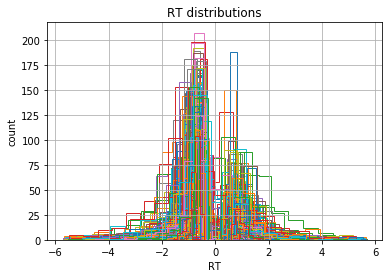

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
## all ratings (congruent faces)
# subset dataset by emotion rating type and facial expression (congruent)
xx_data = data.loc[(data['emotionRating'] == data['expression'])]
xx_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
1   lbmmswtrr0mpvov      0         3     surprised      1   
3   lbmmswtrr0mpvov      0         3     surprised      3   
13  lbmmswtrr0mpvov      0         3     surprised     13   
18  lbmmswtrr0mpvov      0         3     surprised     18   
31  lbmmswtrr0mpvov      0         3     surprised     31   
36  lbmmswtrr0mpvov      0         3     surprised     36   
44  lbmmswtrr0mpvov      0         3     surprised     44   
45  lbmmswtrr0mpvov      0         3     surprised     45   
51  lbmmswtrr0mpvov      0         3     surprised     51   
57  lbmmswtrr0mpvov      1         4       fearful     57   

               stimulus      face model ethnicity sex expression      mask  \
1   _faces/BM17_R_X.jpg  BM17_R_X  BM17         B   M  surprised  baseline   
3   _faces/BM17_R_L.jpg  BM17_R_L  BM17         B   M  surprised     lower   
13  _faces/AM04_R_L.jpg  AM04_R_L  AM04         A   M  surprised     lower   
18  _faces/WF02_R_X.jpg  WF02_R_X  WF02         W   F  surprised  baseline   
31  _faces/AM04_R_X.jpg  AM04_R_X  AM04         A   M  surprised  baseline   
36  _faces/WF02_R_U.jpg  WF02_R_U  WF02         W   F  surprised     upper   
44  _faces/WF02_R_L.jpg  WF02_R_L  WF02         W   F  surprised     lower   
45  _faces/AM04_R_U.jpg  AM04_R_U  AM04         A   M  surprised     upper   
51  _faces/BM17_R_U.jpg  BM17_R_U  BM17         B   M  surprised     upper   
57  _faces/HF09_F_X.jpg  HF09_F_X  HF09         H   F    fearful  baseline   

    response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
1          1  1.122130          0              0            0          0   
3          1  1.347000          0              0            0          0   
13         0 -1.250875          0              0            0          0   
18         1  0.676070          0              0            0          0   
31         1  1.268375          0              0            0          0   
36         1  0.908140          0              0            0          0   
44         1  0.850425          0              0            0          0   
45         1  0.876780          0              0            0          0   
51         0 -0.725275          0              0            0          0   
57         1  1.147445          0              0          100          0   

    faceSad  faceSurprised  
1         0            100  
3         0             50  
13        0             50  
18        0            100  
31        0            100  
36        0             50  
44        0             50  
45        0             50  
51        0             50  
57        0              0

In [5]:
# define model
m_xx = hddm.HDDMRegressor(xx_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 27087.6 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean         std        2.5q        25q        50q        75q      97.5q       mc err
a                                   1.59304   0.0231227     1.54789    1.57711    1.59265    1.60834    1.63853  0.000469202
a_std                              0.353743   0.0182687    0.320117   0.340941   0.353101   0.365626   0.391759  0.000426362
a_subj.09coqg8hlpux6fe              1.23427   0.0841493     1.08523     1.1738    1.23056    1.28918    1.41712   0.00176783
a_subj.0b3t2skj9mlhbkn              1.51549    0.102232     1.33216    1.44341    1.51306    1.58135    1.72278    0.0021243
a_subj.0bcg7mtj2n1jjw9              3.21241    0.252875     2.76334    3.03403    3.19779    3.37506    3.75142   0.00666369
a_subj.0s53r30oouek89b              2.20375    0.146054     1.94523     2.1045    2.19571    2.29452    2.51166   0.00332953
a_subj.0uj9gbhag3o1w1v              1.73903    0.134623     1.49968    1.64738    1.73001     1.8218    2.02613   0.00319969


Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


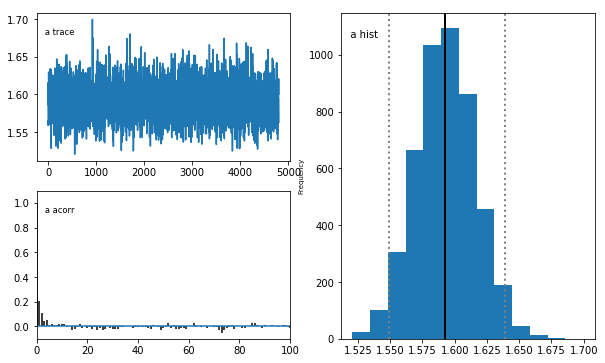

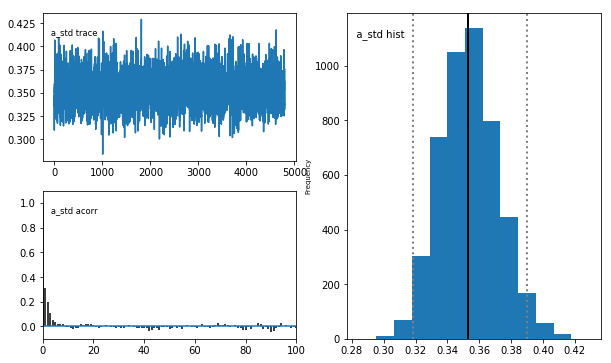

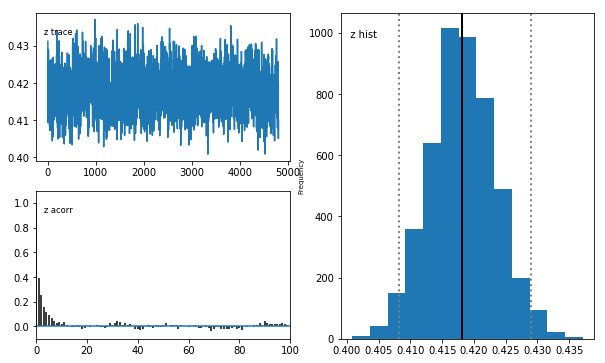

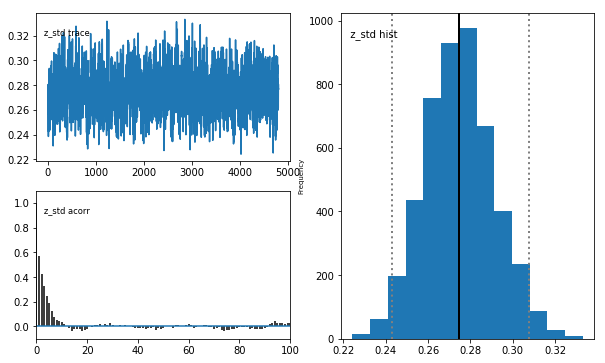

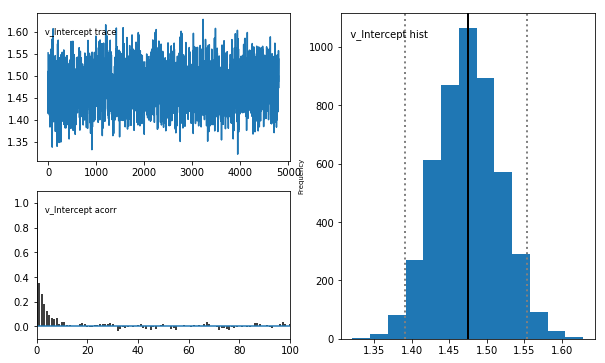

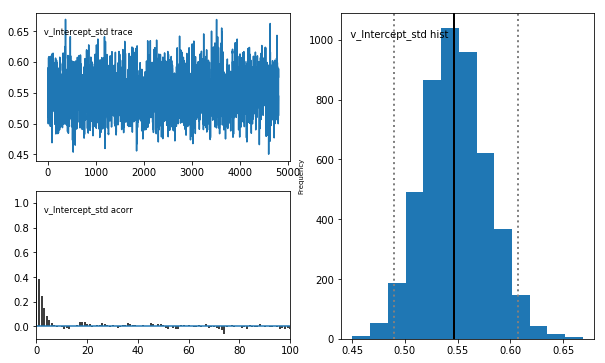

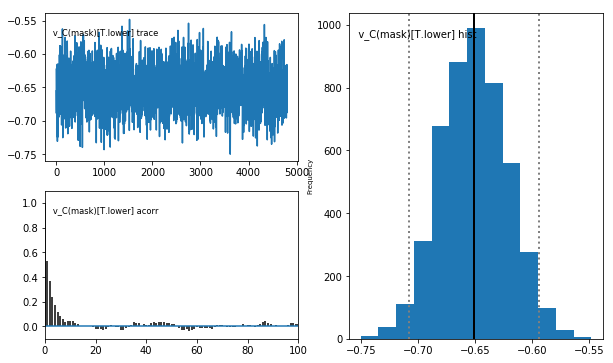

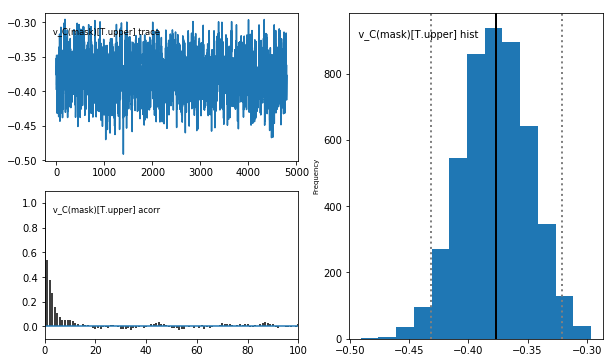

In [6]:
# run model
m_xx.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_xx.print_stats()
m_xx.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std      2.5q       25q  \
a                                  1.59304  0.0231227   1.54789   1.57711   
a_std                             0.353743  0.0182687  0.320117  0.340941   
a_subj.09coqg8hlpux6fe             1.23427  0.0841493   1.08523    1.1738   
a_subj.0b3t2skj9mlhbkn             1.51549   0.102232   1.33216   1.44341   
a_subj.0bcg7mtj2n1jjw9             3.21241   0.252875   2.76334   3.03403   
a_subj.0s53r30oouek89b             2.20375   0.146054   1.94523    2.1045   
a_subj.0uj9gbhag3o1w1v             1.73903   0.134623   1.49968   1.64738   
a_subj.17nzn4k8r1qkmrn              1.6063   0.103023   1.42127   1.53468   
a_subj.1fdkw2qjx3hc3lk             1.39175  0.0876782   1.22977   1.33174   
a_subj.1mla0dmotqefnav             1.93908   0.133504   1.70168   1.84573   
a_subj.23hr9tl84h3zhw3             1.54612   0.106579   1.35117    1.4716   
a_subj.27muqwvalwne26r             1.94555   0.144874   1.68169   1.84405   

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


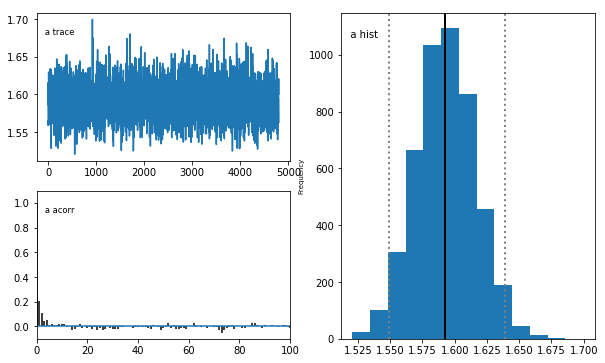

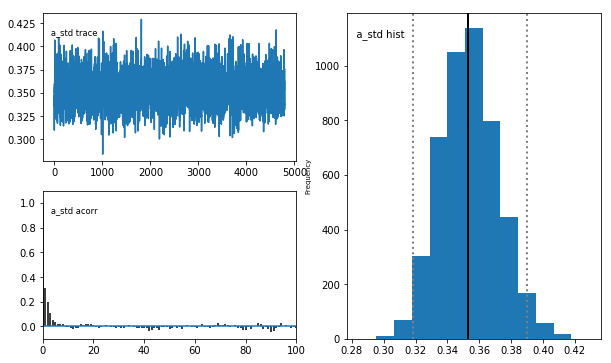

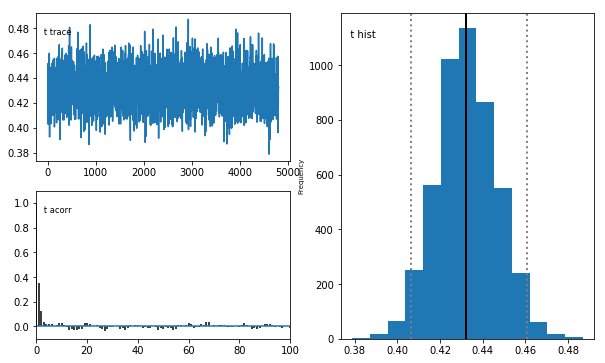

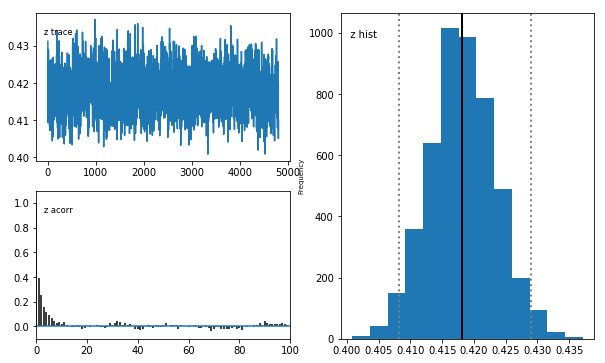

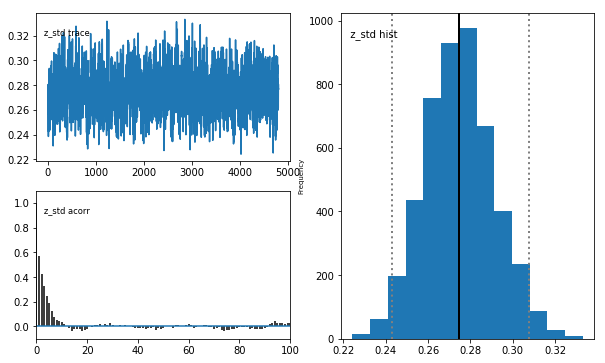

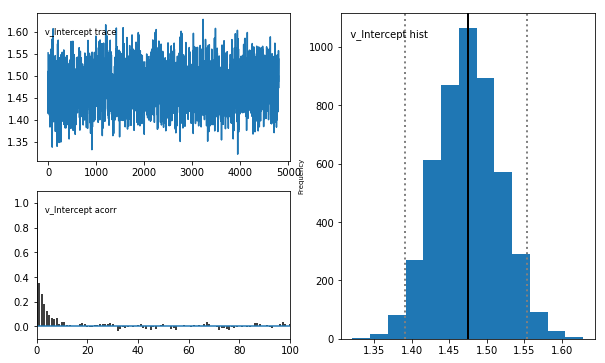

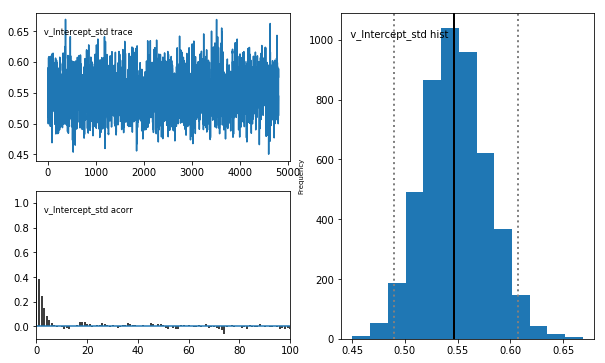

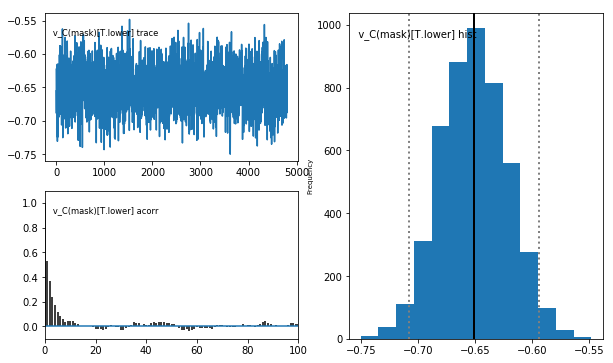

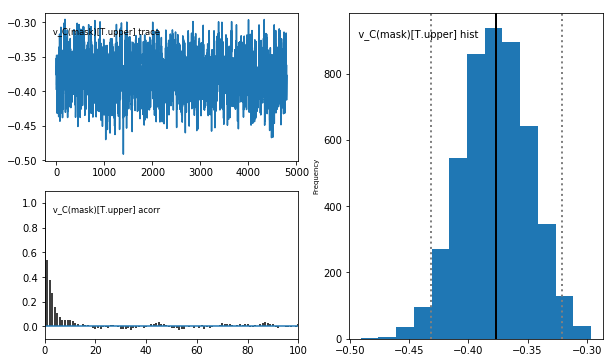

In [7]:
# save model stats
xx_stats = m_xx.gen_stats()
print(xx_stats)
# xx_stats.to_csv('_drift_maskFalseNegatives/xx_5000/faceMask2_hddm_drift_maskFalseNegatives_xx_5000.csv', index=True)

# save model posterior plots
# m_xx.plot_posteriors(path='_drift_maskFalseNegatives/xx_5000/_posteriors', save=True)

In [8]:
# plot model posteriors by mask
xx_v_none, xx_v_lower, xx_v_upper = m_xx.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([xx_v_none, xx_v_lower, xx_v_upper])
# plt.savefig('_drift_maskFalseNegatives/xx_5000/faceMask2_hddm_drift_maskFalseNegatives_xx_5000_v_mask.pdf')

In [9]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(xx_v_none < 0) = ", (xx_v_none.trace() < 0).mean())
print("P(xx_v_lower > 0) = ", (xx_v_lower.trace() > 0).mean())
print("P(xx_v_upper > 0) = ", (xx_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(xx_v_lower > xx_v_upper) = ", (xx_v_lower.trace() > xx_v_upper.trace()).mean())

P(xx_v_none < 0) =  0.0
P(xx_v_lower > 0) =  0.0
P(xx_v_upper > 0) =  0.0
P(xx_v_lower > xx_v_upper) =  0.0


In [10]:
## rating angry (angry faces)
# subset dataset by emotion rating type (angry) and facial expression (angry)
aa_data = data.loc[(data['emotionRating'] == 'angry') & (data['expression'] == 'angry')]
aa_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
269  lbmmswtrr0mpvov      5         2         angry    270   
271  lbmmswtrr0mpvov      5         2         angry    272   
283  lbmmswtrr0mpvov      5         2         angry    284   
285  lbmmswtrr0mpvov      5         2         angry    286   
286  lbmmswtrr0mpvov      5         2         angry    287   
288  lbmmswtrr0mpvov      5         2         angry    289   
290  lbmmswtrr0mpvov      5         2         angry    291   
291  lbmmswtrr0mpvov      5         2         angry    292   
322  lbmmswtrr0mpvov      5         2         angry    323   
433  mr81dhy9r5lxu8r      2         5         angry    111   

                stimulus      face model ethnicity sex expression      mask  \
269  _faces/BF10_A_X.jpg  BF10_A_X  BF10         B   F      angry  baseline   
271  _faces/HF09_A_L.jpg  HF09_A_L  HF09         H   F      angry     lower   
283  _faces/WM13_A_L.jpg  WM13_A_L  WM13         W   M      angry     lower   
285  _faces/HF09_A_U.jpg  HF09_A_U  HF09         H   F      angry     upper   
286  _faces/BF10_A_L.jpg  BF10_A_L  BF10         B   F      angry     lower   
288  _faces/BF10_A_U.jpg  BF10_A_U  BF10         B   F      angry     upper   
290  _faces/WM13_A_X.jpg  WM13_A_X  WM13         W   M      angry  baseline   
291  _faces/HF09_A_X.jpg  HF09_A_X  HF09         H   F      angry  baseline   
322  _faces/WM13_A_U.jpg  WM13_A_U  WM13         W   M      angry     upper   
433  _faces/BM17_A_L.jpg  BM17_A_L  BM17         B   M      angry     lower   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
269         1  1.570545        100              0            0          0   
271         1  0.988070         50              0            0          0   
283         1  0.758390         50              0            0          0   
285         1  1.196710         50              0            0          0   
286         1  0.885205         50              0            0          0   
288         0 -1.356640         50              0            0          0   
290         1  1.074130        100              0            0          0   
291         1  0.907300        100              0            0          0   
322         0 -0.707780         50              0            0          0   
433         0 -1.155000         50              0            0          0   

     faceSad  faceSurprised  
269        0              0  
271        0              0  
283        0              0  
285        0              0  
286        0              0  
288        0              0  
290        0              0  
291        0              0  
322        0              0  
433        0              0

In [12]:
# drop any subjects missing columns in design matrix (otherwise produces error)
aa_data = aa_data[(aa_data.subj_idx != 'bmlp46ta94pzt5x') & (aa_data.subj_idx != 'dqph4ch0mkofejw') & (aa_data.subj_idx != 'me8doxrmo9vj9dx')]

In [13]:
# define model
m_aa = hddm.HDDMRegressor(aa_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 41369.3 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean         std        2.5q        25q        50q        75q      97.5q       mc err
a                                   1.56544   0.0351515       1.496    1.54233    1.56528    1.58906    1.63457   0.00124098
a_std                              0.403411   0.0318036    0.342025   0.382188   0.402276   0.424495   0.466953   0.00127918
a_subj.09coqg8hlpux6fe              1.51005    0.218347     1.12508    1.36004    1.49229    1.64575    1.97973   0.00458628
a_subj.0b3t2skj9mlhbkn              1.43842    0.250318     1.02558    1.25935    1.41352    1.59155    2.00629   0.00597222
a_subj.0bcg7mtj2n1jjw9              2.63983    0.370853     2.01335     2.3743    2.60955    2.86435    3.45177     0.008143
a_subj.0s53r30oouek89b              2.09396    0.376114     1.47022    1.82711    2.05603     2.3256    2.92724   0.00925524
a_subj.0uj9gbhag3o1w1v              1.93921    0.355097      1.3556    1.68237    1.90794    2.14822    2.73466   0.00919357


Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


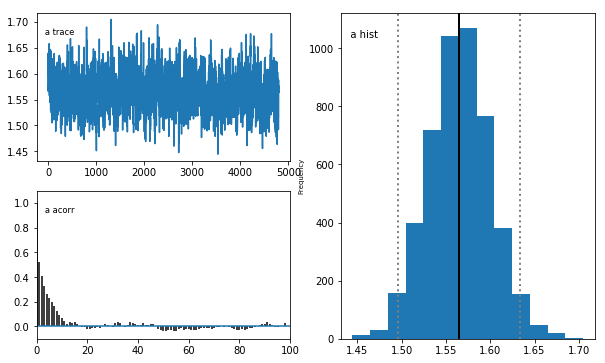

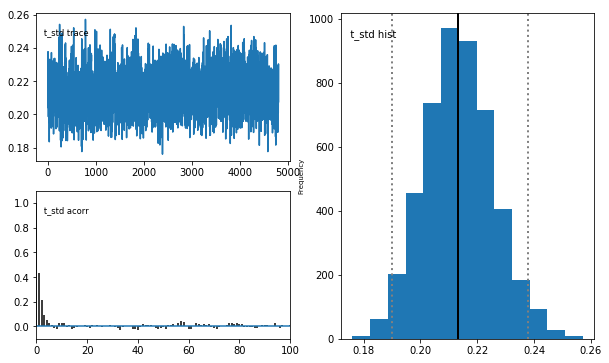

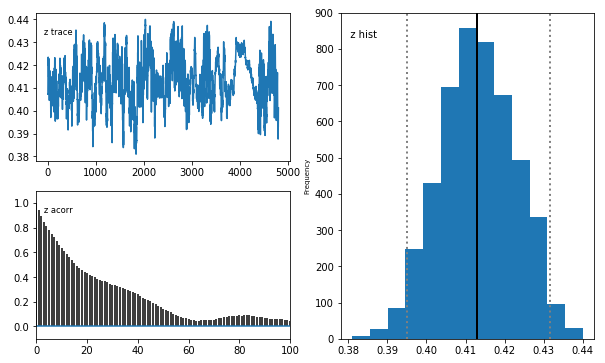

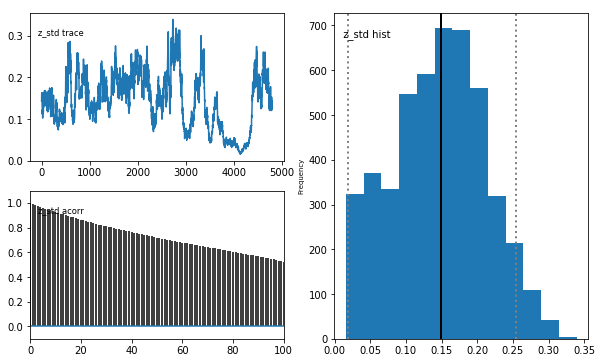

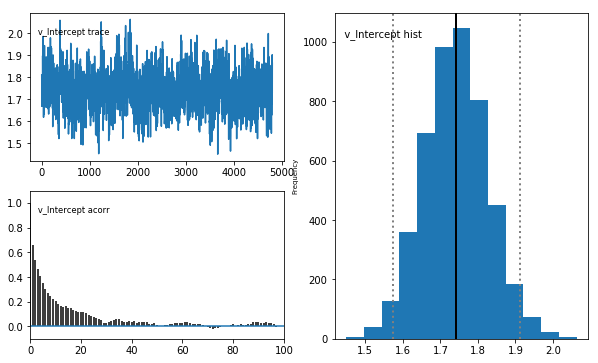

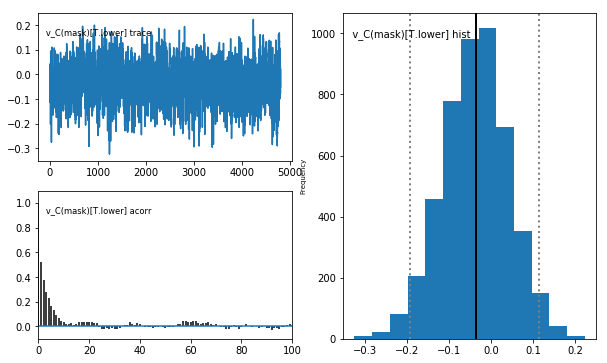

In [14]:
# run model
m_aa.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_aa.print_stats()
m_aa.plot_posteriors()

In [24]:
# save model stats
aa_stats = m_aa.gen_stats()
print(aa_stats)
# aa_stats.to_csv('_drift_maskFalseNegatives/aa_5000/faceMask2_hddm_drift_maskFalseNegatives_aa_5000.csv', index=True)

# save model posterior plots
# m_aa.plot_posteriors(path='_drift_maskFalseNegatives/aa_5000/_posteriors', save=True)

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q  \
a                                   1.56544  0.0351515      1.496    1.54233   
a_std                              0.403411  0.0318036   0.342025   0.382188   
a_subj.09coqg8hlpux6fe              1.51005   0.218347    1.12508    1.36004   
a_subj.0b3t2skj9mlhbkn              1.43842   0.250318    1.02558    1.25935   
a_subj.0bcg7mtj2n1jjw9              2.63983   0.370853    2.01335     2.3743   
a_subj.0s53r30oouek89b              2.09396   0.376114    1.47022    1.82711   
a_subj.0uj9gbhag3o1w1v              1.93921   0.355097     1.3556    1.68237   
a_subj.17nzn4k8r1qkmrn              1.55365   0.242794    1.13906    1.38365   
a_subj.1fdkw2qjx3hc3lk              1.39928   0.199246    1.05378     1.2588   
a_subj.1mla0dmotqefnav              1.40714   0.252667   0.993336    1.22344   
a_subj.23hr9tl84h3zhw3               1.5804   0.318592    1.07048    1.34773   
a_subj.27muqwvalwne26r              1.78

In [16]:
# plot model posteriors by mask
aa_v_none, aa_v_lower, aa_v_upper = m_aa.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([aa_v_none, aa_v_lower, aa_v_upper])
# plt.savefig('_drift_maskFalseNegatives/aa_5000/faceMask2_hddm_drift_maskFalseNegatives_aa_5000_v_mask.pdf')

In [18]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(aa_v_none < 0) = ", (aa_v_none.trace() < 0).mean())
print("P(aa_v_lower > 0) = ", (aa_v_lower.trace() > 0).mean())
print("P(aa_v_upper > 0) = ", (aa_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(aa_v_lower < aa_v_upper) = ", (aa_v_lower.trace() < aa_v_upper.trace()).mean())

P(aa_v_none < 0) =  0.0
P(aa_v_lower > 0) =  0.314791666667
P(aa_v_upper > 0) =  0.0
P(aa_v_lower < aa_v_upper) =  0.0


In [19]:
## rating disgusted (disgusted faces)
# subset dataset by emotion rating type (disgusted) and facial expression (disgusted)
dd_data = data.loc[(data['emotionRating'] == 'disgusted') & (data['expression'] == 'disgusted')]
dd_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
168  lbmmswtrr0mpvov      3         5     disgusted    169   
172  lbmmswtrr0mpvov      3         5     disgusted    173   
174  lbmmswtrr0mpvov      3         5     disgusted    175   
178  lbmmswtrr0mpvov      3         5     disgusted    179   
180  lbmmswtrr0mpvov      3         5     disgusted    181   
182  lbmmswtrr0mpvov      3         5     disgusted    183   
185  lbmmswtrr0mpvov      3         5     disgusted    186   
205  lbmmswtrr0mpvov      3         5     disgusted    206   
390  mr81dhy9r5lxu8r      1         6     disgusted     68   
395  mr81dhy9r5lxu8r      1         6     disgusted     73   

                stimulus      face model ethnicity sex expression      mask  \
168  _faces/WF05_D_X.jpg  WF05_D_X  WF05         W   F  disgusted  baseline   
172  _faces/HF04_D_U.jpg  HF04_D_U  HF04         H   F  disgusted     upper   
174  _faces/WF05_D_L.jpg  WF05_D_L  WF05         W   F  disgusted     lower   
178  _faces/AM07_D_L.jpg  AM07_D_L  AM07         A   M  disgusted     lower   
180  _faces/HF04_D_X.jpg  HF04_D_X  HF04         H   F  disgusted  baseline   
182  _faces/AM07_D_X.jpg  AM07_D_X  AM07         A   M  disgusted  baseline   
185  _faces/WF05_D_U.jpg  WF05_D_U  WF05         W   F  disgusted     upper   
205  _faces/HF04_D_L.jpg  HF04_D_L  HF04         H   F  disgusted     lower   
390  _faces/BM17_D_L.jpg  BM17_D_L  BM17         B   M  disgusted     lower   
395  _faces/AM04_D_U.jpg  AM04_D_U  AM04         A   M  disgusted     upper   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
168         1  1.753920          0            100            0          0   
172         0 -0.932020          0             50            0          0   
174         1  1.042840          0             50            0          0   
178         0 -1.147580          0             50            0          0   
180         1  1.161815          0            100            0          0   
182         1  1.260355          0            100            0          0   
185         1  1.044640          0             50            0          0   
205         0 -0.900665          0             50            0          0   
390         0 -1.023000          0             50            0          0   
395         0 -1.134000          0             50            0          0   

     faceSad  faceSurprised  
168        0              0  
172        0              0  
174        0              0  
178        0              0  
180        0              0  
182        0              0  
185        0              0  
205        0              0  
390        0              0  
395        0              0

In [21]:
# drop any subjects missing columns in design matrix to make model run (otherwise produces error)
dd_data = dd_data[(dd_data.subj_idx != 'hdn2l3df216jykn')]

In [22]:
# define model
m_dd = hddm.HDDMRegressor(dd_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 41871.4 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q         25q        50q        75q      97.5q       mc err
a                                   1.51248    0.03296    1.44977     1.49053    1.51221    1.53412     1.5782  0.000949001
a_std                              0.422708  0.0310292   0.365185    0.401057   0.422127   0.443158   0.484889   0.00110258
a_subj.09coqg8hlpux6fe                1.316   0.211386   0.965088     1.16468    1.29443    1.45027     1.7872   0.00500998
a_subj.0b3t2skj9mlhbkn              1.41236   0.255581   0.989339     1.22534    1.38819    1.57288    1.97493   0.00736586
a_subj.0bcg7mtj2n1jjw9              2.74677   0.375552    2.10636     2.47882    2.72133    2.97459    3.57432   0.00732165
a_subj.0s53r30oouek89b              2.53391   0.327315    1.96174     2.30613    2.50552    2.73458    3.24124     0.006194
a_subj.0uj9gbhag3o1w1v              1.56214   0.263449    1.11848     1.37816    1.52983    1.71411     2.1566    0.0068943
a_subj.1

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


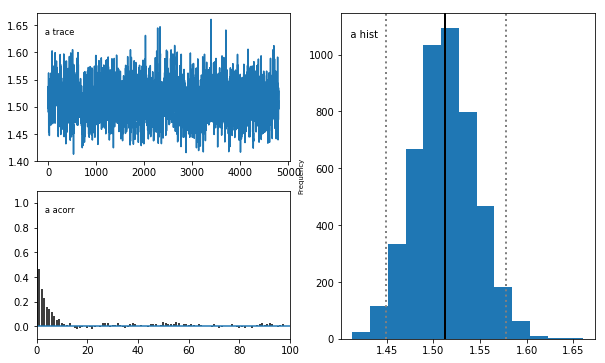

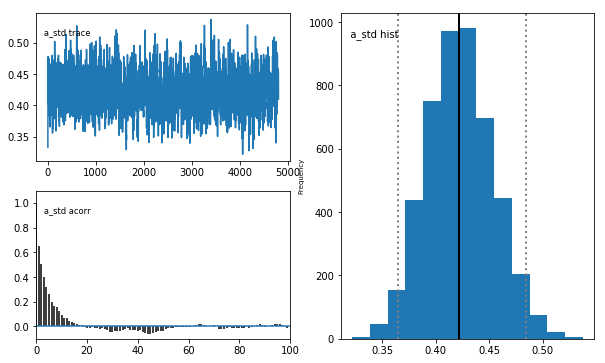

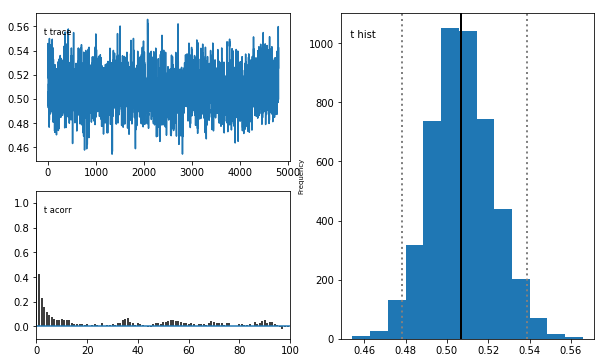

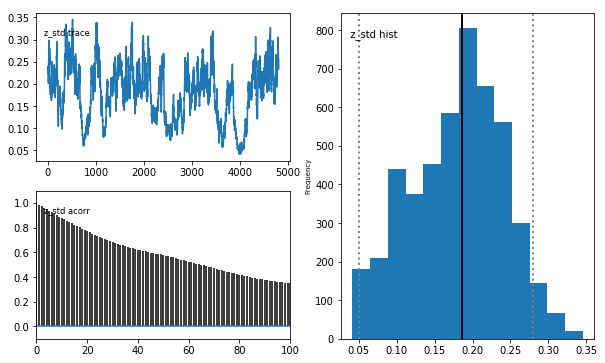

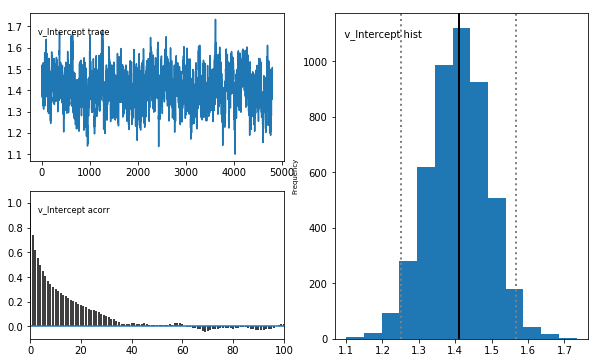

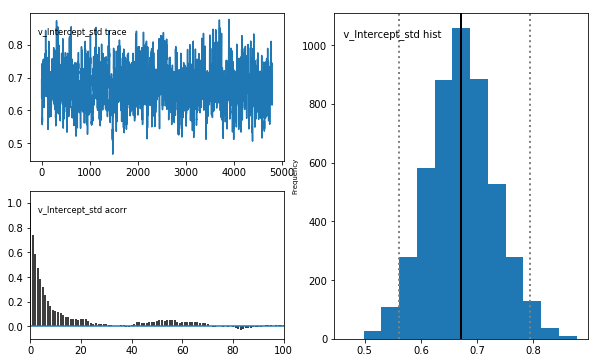

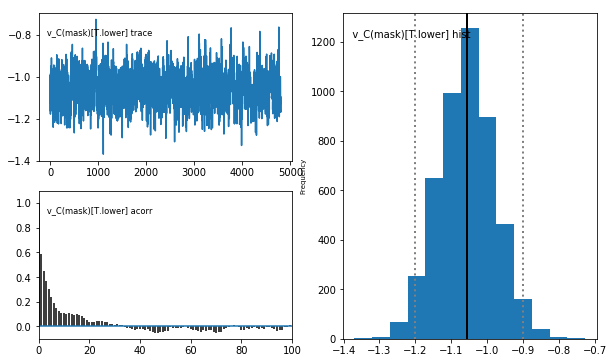

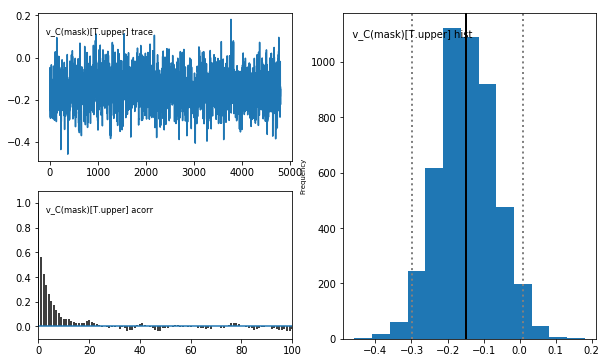

In [23]:
# run model
m_dd.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_dd.print_stats()
m_dd.plot_posteriors()

In [26]:
# save model stats
dd_stats = m_dd.gen_stats()
print(dd_stats)
# dd_stats.to_csv('_drift_maskFalseNegatives/dd_5000/faceMask2_hddm_drift_maskFalseNegatives_dd_5000.csv', index=True)

# save model posterior plots
# m_dd.plot_posteriors(path='_drift_maskFalseNegatives/dd_5000/_posteriors', save=True)

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std       2.5q        25q  \
a                                  1.51248    0.03296    1.44977    1.49053   
a_std                             0.422708  0.0310292   0.365185   0.401057   
a_subj.09coqg8hlpux6fe               1.316   0.211386   0.965088    1.16468   
a_subj.0b3t2skj9mlhbkn             1.41236   0.255581   0.989339    1.22534   
a_subj.0bcg7mtj2n1jjw9             2.74677   0.375552    2.10636    2.47882   
a_subj.0s53r30oouek89b             2.53391   0.327315    1.96174    2.30613   
a_subj.0uj9gbhag3o1w1v             1.56214   0.263449    1.11848    1.37816   
a_subj.17nzn4k8r1qkmrn             1.56371   0.228715    1.16086    1.40525   
a_subj.1fdkw2qjx3hc3lk             1.77451   0.240909    1.35635    1.60195   
a_subj.1mla0dmotqefnav             1.95657   0.257517    1.50598    1.77431   
a_subj.23hr9tl84h3zhw3             1.58129   0.232815    1.18523    1.41977   
a_subj.27muqwvalwne26r             1.75027   0.27395

In [27]:
# plot model posteriors by mask
dd_v_none, dd_v_lower, dd_v_upper = m_dd.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([dd_v_none, dd_v_lower, dd_v_upper])
# plt.savefig('_drift_maskFalseNegatives/dd_5000/faceMask2_hddm_drift_maskFalseNegatives_dd_5000_v_mask.pdf')

In [29]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(dd_v_none < 0) = ", (dd_v_none.trace() < 0).mean())
print("P(dd_v_lower > 0) = ", (dd_v_lower.trace() > 0).mean())
print("P(dd_v_upper > 0) = ", (dd_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(dd_v_lower > dd_v_upper) = ", (dd_v_lower.trace() > dd_v_upper.trace()).mean())

P(dd_v_none < 0) =  0.0
P(dd_v_lower > 0) =  0.0
P(dd_v_upper > 0) =  0.034375
P(dd_v_lower > dd_v_upper) =  0.0


In [30]:
## rating fearful (fearful faces)
# subset dataset by emotion rating type (fearful) and facial expression (fearful)
ff_data = data.loc[(data['emotionRating'] == 'fearful') & (data['expression'] == 'fearful')]
ff_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
57   lbmmswtrr0mpvov      1         4       fearful     57   
64   lbmmswtrr0mpvov      1         4       fearful     64   
70   lbmmswtrr0mpvov      1         4       fearful     70   
74   lbmmswtrr0mpvov      1         4       fearful     74   
92   lbmmswtrr0mpvov      1         4       fearful     92   
95   lbmmswtrr0mpvov      1         4       fearful     95   
102  lbmmswtrr0mpvov      1         4       fearful    102   
103  lbmmswtrr0mpvov      1         4       fearful    103   
106  lbmmswtrr0mpvov      1         4       fearful    106   
333  mr81dhy9r5lxu8r      0         4       fearful     10   

                stimulus      face model ethnicity sex expression      mask  \
57   _faces/HF09_F_X.jpg  HF09_F_X  HF09         H   F    fearful  baseline   
64   _faces/WM13_F_U.jpg  WM13_F_U  WM13         W   M    fearful     upper   
70   _faces/BF10_F_L.jpg  BF10_F_L  BF10         B   F    fearful     lower   
74   _faces/BF10_F_X.jpg  BF10_F_X  BF10         B   F    fearful  baseline   
92   _faces/BF10_F_U.jpg  BF10_F_U  BF10         B   F    fearful     upper   
95   _faces/HF09_F_L.jpg  HF09_F_L  HF09         H   F    fearful     lower   
102  _faces/WM13_F_L.jpg  WM13_F_L  WM13         W   M    fearful     lower   
103  _faces/HF09_F_U.jpg  HF09_F_U  HF09         H   F    fearful     upper   
106  _faces/WM13_F_X.jpg  WM13_F_X  WM13         W   M    fearful  baseline   
333  _faces/BF10_F_L.jpg  BF10_F_L  BF10         B   F    fearful     lower   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
57          1  1.147445          0              0          100          0   
64          1  1.012920          0              0           50          0   
70          1  0.669780          0              0           50          0   
74          1  0.827940          0              0          100          0   
92          0 -2.819985          0              0           50          0   
95          1  0.810080          0              0           50          0   
102         1  0.923765          0              0           50          0   
103         1  1.085630          0              0           50          0   
106         1  0.700685          0              0          100          0   
333         1  1.404000          0              0           50          0   

     faceSad  faceSurprised  
57         0              0  
64         0              0  
70         0              0  
74         0              0  
92         0              0  
95         0              0  
102        0              0  
103        0              0  
106        0              0  
333        0              0

In [32]:
# drop any subjects missing columns in design matrix to make model run (otherwise produces error)
ff_data = ff_data[(ff_data.subj_idx != 'me8doxrmo9vj9dx') & (ff_data.subj_idx != 'n4v0blzwqwgrcpn') & (ff_data.subj_idx != 'xs5439nm2v85thb')]

In [33]:
# define model
m_ff = hddm.HDDMRegressor(ff_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 50493.4 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std        2.5q        25q         50q        75q      97.5q       mc err
a                                    1.57165   0.034644     1.50811    1.54798     1.57001    1.59505    1.64306   0.00127851
a_std                               0.395512  0.0306458     0.33932    0.37442    0.393746   0.415097   0.457661   0.00122629
a_subj.09coqg8hlpux6fe               1.39556   0.255197    0.964184    1.21118     1.37364      1.554    1.95978   0.00593162
a_subj.0b3t2skj9mlhbkn                1.6341   0.278574     1.16803    1.43519     1.60279    1.80761    2.25613   0.00676867
a_subj.0bcg7mtj2n1jjw9               2.50623   0.389369     1.82817    2.22622     2.47892    2.74748       3.36   0.00822145
a_subj.0s53r30oouek89b               2.21482   0.325721     1.66621    1.98995     2.18117    2.40897    2.96221    0.0076823
a_subj.0uj9gbhag3o1w1v                 1.861   0.273411     1.40198    1.66321     1.83759    2.03007    2.45758   0.0

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


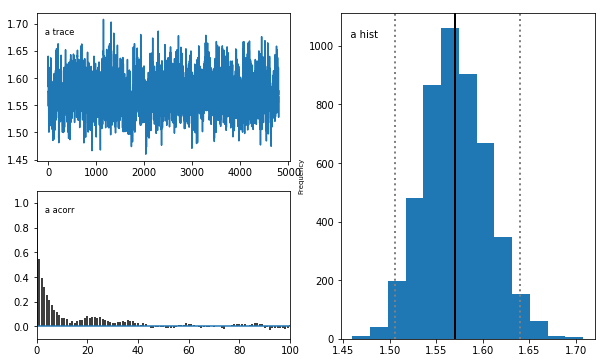

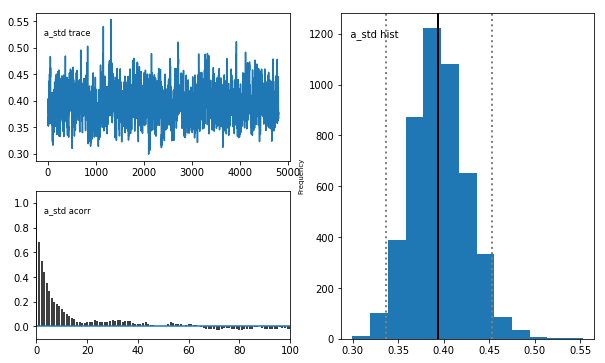

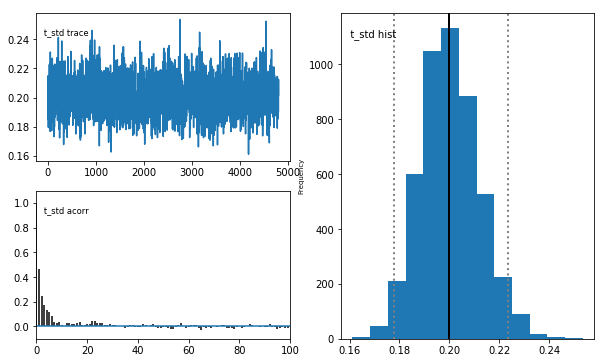

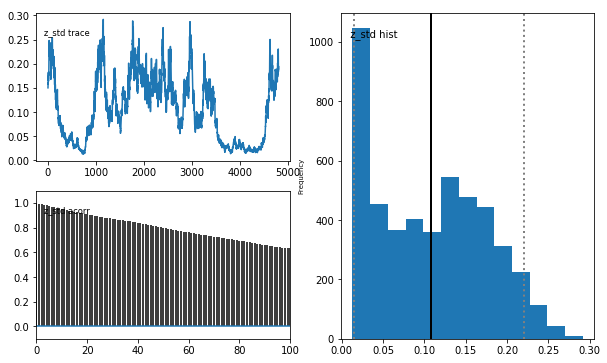

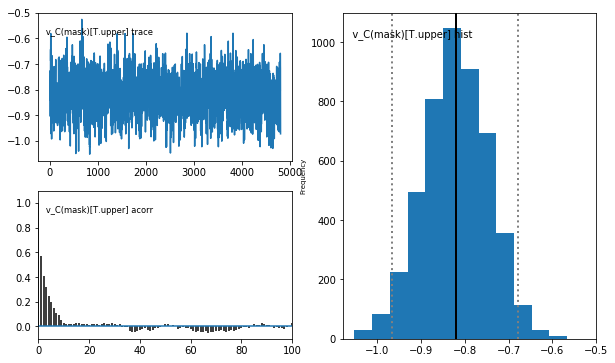

In [34]:
# run model
m_ff.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ff.print_stats()
m_ff.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std      2.5q       25q  \
a                                   1.57165   0.034644   1.50811   1.54798   
a_std                              0.395512  0.0306458   0.33932   0.37442   
a_subj.09coqg8hlpux6fe              1.39556   0.255197  0.964184   1.21118   
a_subj.0b3t2skj9mlhbkn               1.6341   0.278574   1.16803   1.43519   
a_subj.0bcg7mtj2n1jjw9              2.50623   0.389369   1.82817   2.22622   
a_subj.0s53r30oouek89b              2.21482   0.325721   1.66621   1.98995   
a_subj.0uj9gbhag3o1w1v                1.861   0.273411   1.40198   1.66321   
a_subj.17nzn4k8r1qkmrn              1.61655   0.243108   1.20748   1.44469   
a_subj.1fdkw2qjx3hc3lk              1.59175   0.228735   1.19078   1.43103   
a_subj.1mla0dmotqefnav              1.55191   0.217482   1.17795   1.39422   
a_subj.23hr9tl84h3zhw3              1.43066   0.202343   1.08858   1.28656   
a_subj.27muqwvalwne26r               1.6548   0.226859   1.26783

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


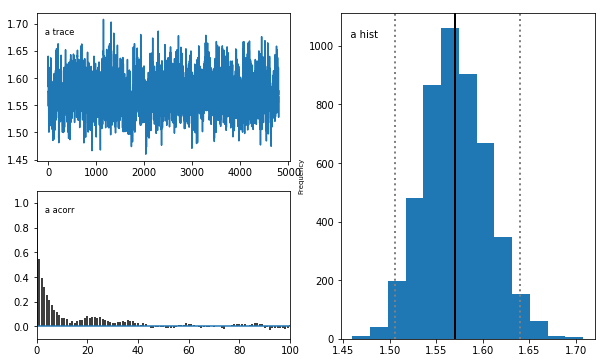

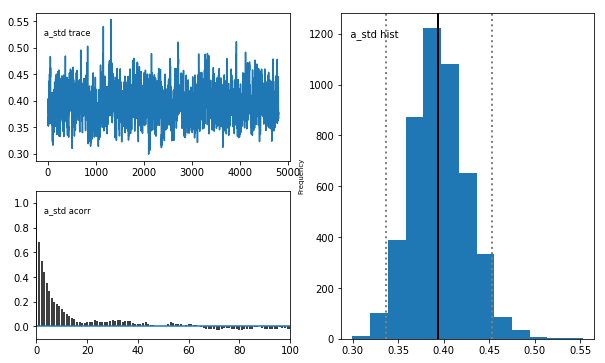

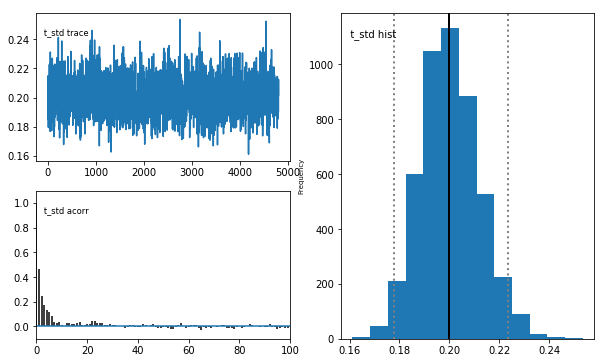

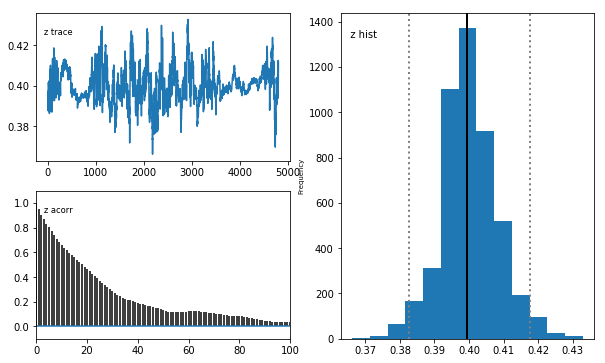

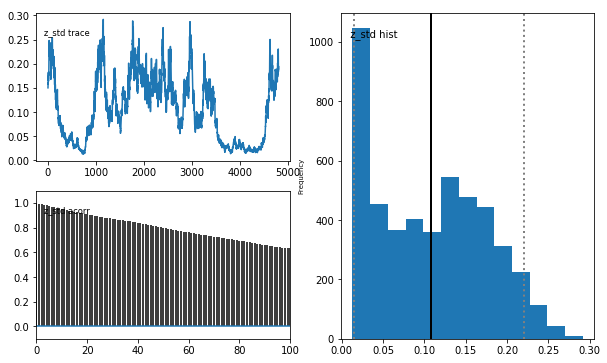

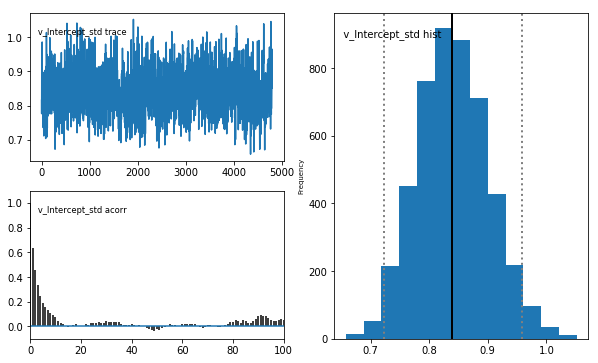

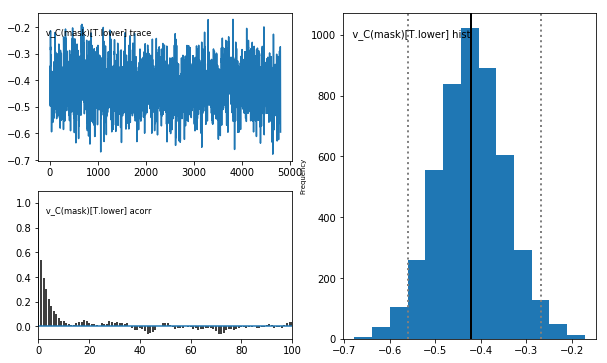

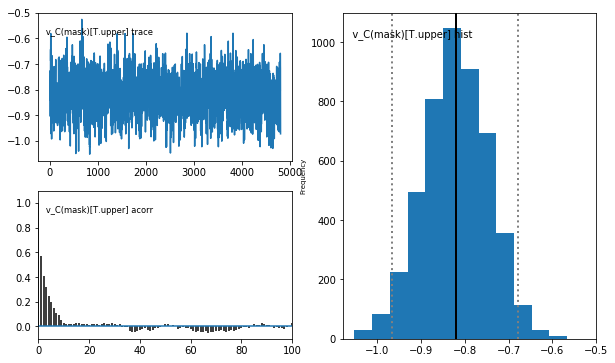

In [35]:
# save model stats
ff_stats = m_ff.gen_stats()
print(ff_stats)
# ff_stats.to_csv('_drift_maskFalseNegatives/ff_5000/faceMask2_hddm_drift_maskFalseNegatives_ff_5000.csv', index=True)

# save model posterior plots
# m_ff.plot_posteriors(path='_drift_maskFalseNegatives/ff_5000/_posteriors', save=True)

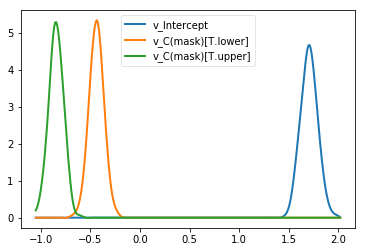

In [36]:
# plot model posteriors by mask
ff_v_none, ff_v_lower, ff_v_upper = m_ff.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ff_v_none, ff_v_lower, ff_v_upper])
# plt.savefig('_drift_maskFalseNegatives/ff_5000/faceMask2_hddm_drift_maskFalseNegatives_ff_5000_v_mask.pdf')

In [37]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ff_v_none < 0) = ", (ff_v_none.trace() < 0).mean())
print("P(ff_v_lower > 0) = ", (ff_v_lower.trace() > 0).mean())
print("P(ff_v_upper > 0) = ", (ff_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ff_v_lower < ff_v_upper) = ", (ff_v_lower.trace() < ff_v_upper.trace()).mean())

P(ff_v_none < 0) =  0.0
P(ff_v_lower > 0) =  0.0
P(ff_v_upper > 0) =  0.0
P(ff_v_lower < ff_v_upper) =  0.0


In [38]:
## rating happy (happy faces)
# subset dataset by emotion rating type (happy) and facial expression (happy)
hh_data = data.loc[(data['emotionRating'] == 'happy') & (data['expression'] == 'happy')]
hh_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
216  lbmmswtrr0mpvov      4         6         happy    217   
224  lbmmswtrr0mpvov      4         6         happy    225   
226  lbmmswtrr0mpvov      4         6         happy    227   
229  lbmmswtrr0mpvov      4         6         happy    230   
233  lbmmswtrr0mpvov      4         6         happy    234   
242  lbmmswtrr0mpvov      4         6         happy    243   
250  lbmmswtrr0mpvov      4         6         happy    251   
251  lbmmswtrr0mpvov      4         6         happy    252   
256  lbmmswtrr0mpvov      4         6         happy    257   
491  mr81dhy9r5lxu8r      3         1         happy    169   

                stimulus      face model ethnicity sex expression      mask  \
216  _faces/AM11_H_L.jpg  AM11_H_L  AM11         A   M      happy     lower   
224  _faces/HF05_H_L.jpg  HF05_H_L  HF05         H   F      happy     lower   
226  _faces/AM11_H_X.jpg  AM11_H_X  AM11         A   M      happy  baseline   
229  _faces/HF05_H_X.jpg  HF05_H_X  HF05         H   F      happy  baseline   
233  _faces/WM09_H_U.jpg  WM09_H_U  WM09         W   M      happy     upper   
242  _faces/WM09_H_L.jpg  WM09_H_L  WM09         W   M      happy     lower   
250  _faces/HF05_H_U.jpg  HF05_H_U  HF05         H   F      happy     upper   
251  _faces/WM09_H_X.jpg  WM09_H_X  WM09         W   M      happy  baseline   
256  _faces/AM11_H_U.jpg  AM11_H_U  AM11         A   M      happy     upper   
491  _faces/AM07_H_L.jpg  AM07_H_L  AM07         A   M      happy     lower   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
216         1  1.230470          0              0            0         50   
224         1  0.637560          0              0            0         50   
226         0 -0.586810          0              0            0        100   
229         1  0.572350          0              0            0        100   
233         0 -0.564725          0              0            0         50   
242         1  0.727170          0              0            0         50   
250         1  0.644235          0              0            0         50   
251         1  0.644815          0              0            0        100   
256         0 -0.900900          0              0            0         50   
491         1  1.019000          0              0            0         50   

     faceSad  faceSurprised  
216        0              0  
224        0              0  
226        0              0  
229        0              0  
233        0              0  
242        0              0  
250        0              0  
251        0              0  
256        0              0  
491        0              0

In [40]:
# drop any subjects missing columns in design matrix to make model run (otherwise produces error)
hh_data = hh_data[(hh_data.subj_idx != 'hdn2l3df216jykn') & (hh_data.subj_idx != 'o8tx093cd8xp46a')]

In [41]:
# define model
m_hh = hddm.HDDMRegressor(hh_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 45484.1 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std       2.5q        25q         50q        75q      97.5q       mc err
a                                    1.50735   0.0367241    1.43635    1.48245     1.50664    1.53159    1.58012   0.00156399
a_std                               0.419503    0.034268   0.353715   0.396208    0.418589   0.442121   0.488477     0.001508
a_subj.09coqg8hlpux6fe               1.39261    0.243055   0.977225    1.22536     1.37249    1.54159    1.92244    0.0060473
a_subj.0b3t2skj9mlhbkn               1.48566     0.25401    1.04671    1.30762     1.46394    1.63557    2.06841   0.00592001
a_subj.0bcg7mtj2n1jjw9               2.74268    0.408339     2.0551    2.43992     2.70727    2.99116    3.66958   0.00907772
a_subj.0s53r30oouek89b               2.37606     0.39259    1.68401    2.09735     2.34877    2.62119    3.23822   0.00992886
a_subj.0uj9gbhag3o1w1v               1.68156    0.356863    1.11428    1.41911     1.63086     1.8983    2.48119    0.

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


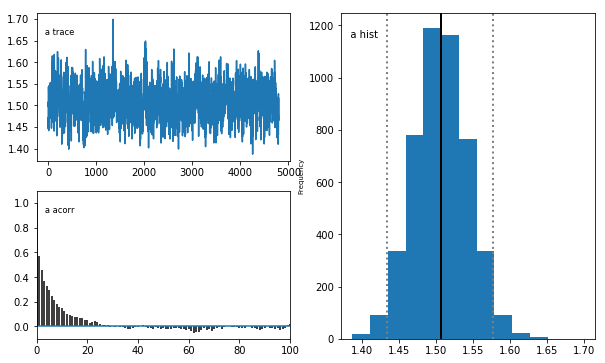

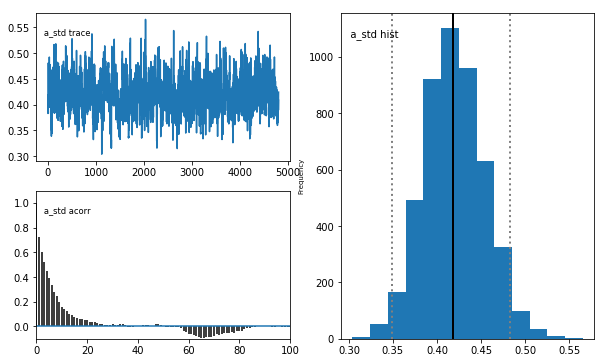

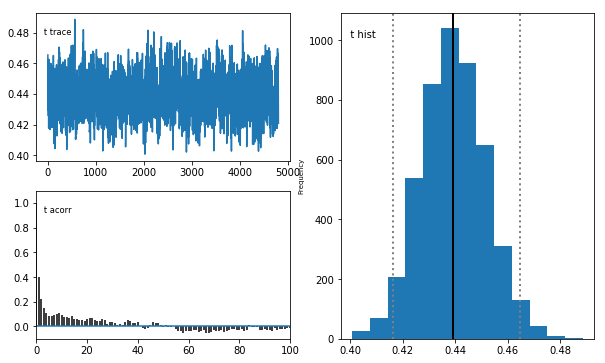

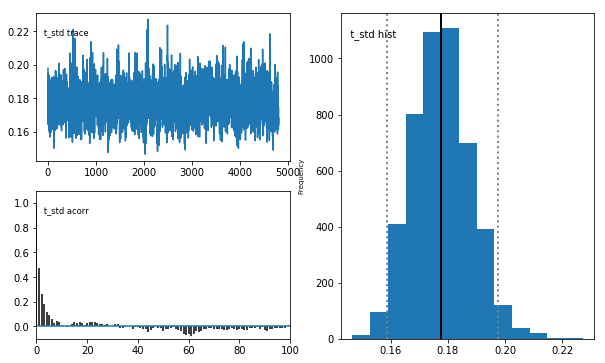

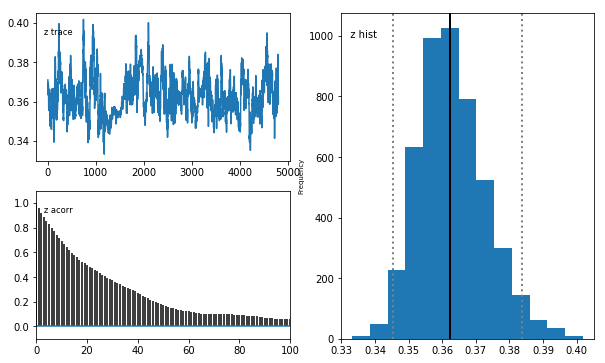

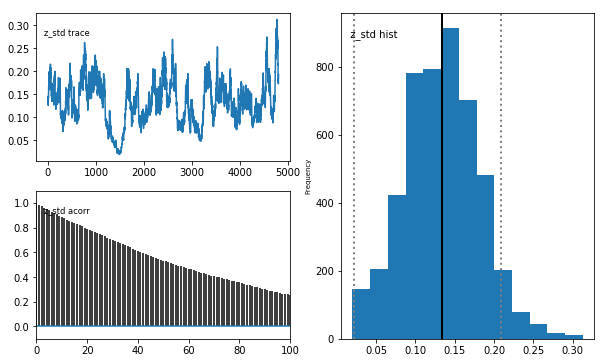

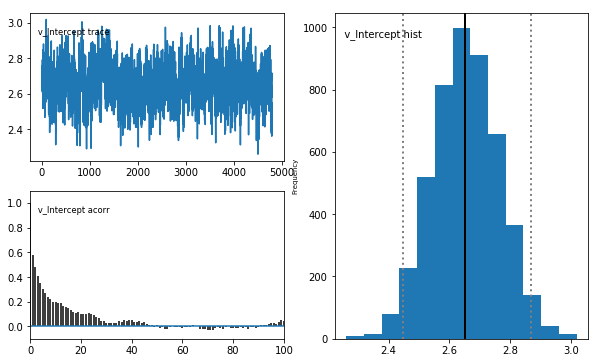

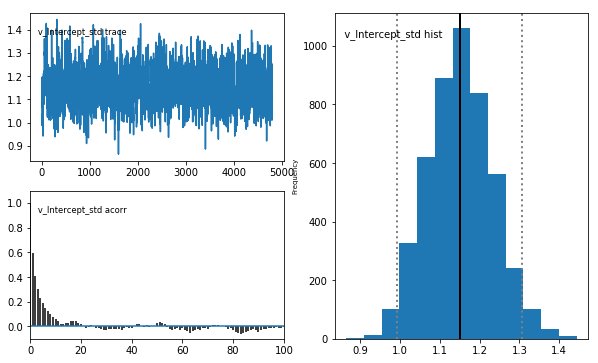

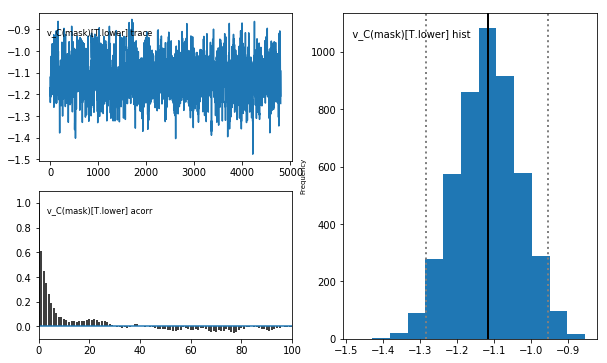

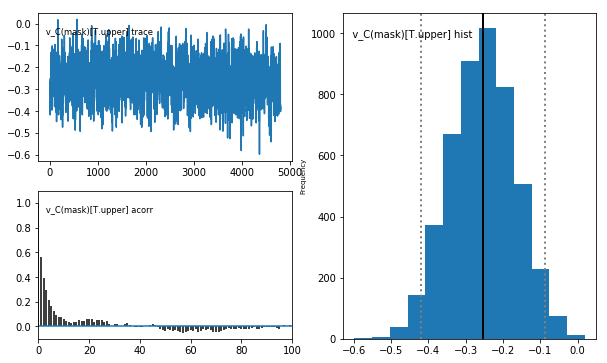

In [42]:
# run model
m_hh.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_hh.print_stats()
m_hh.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std      2.5q       25q  \
a                                  1.50735  0.0367241   1.43635   1.48245   
a_std                             0.419503   0.034268  0.353715  0.396208   
a_subj.09coqg8hlpux6fe             1.39261   0.243055  0.977225   1.22536   
a_subj.0b3t2skj9mlhbkn             1.48566    0.25401   1.04671   1.30762   
a_subj.0bcg7mtj2n1jjw9             2.74268   0.408339    2.0551   2.43992   
a_subj.0s53r30oouek89b             2.37606    0.39259   1.68401   2.09735   
a_subj.0uj9gbhag3o1w1v             1.68156   0.356863   1.11428   1.41911   
a_subj.17nzn4k8r1qkmrn              1.5229   0.225523   1.14401   1.36645   
a_subj.1fdkw2qjx3hc3lk             1.10016   0.202946  0.779649  0.952649   
a_subj.1mla0dmotqefnav             2.56529   0.326204   1.99954   2.32906   
a_subj.23hr9tl84h3zhw3             1.34027   0.242499  0.946161   1.16382   
a_subj.27muqwvalwne26r             1.65458    0.31828   1.11754    1.4277   

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


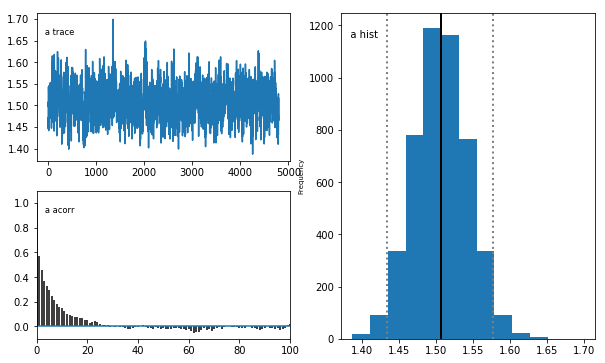

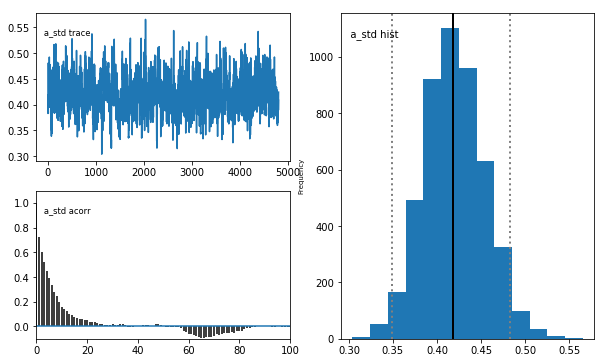

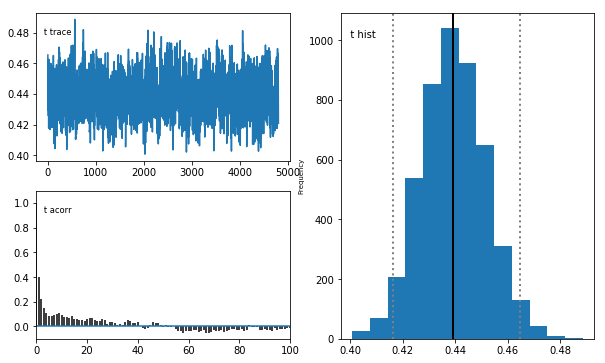

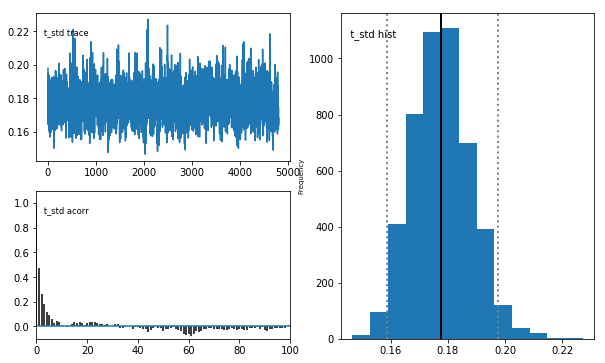

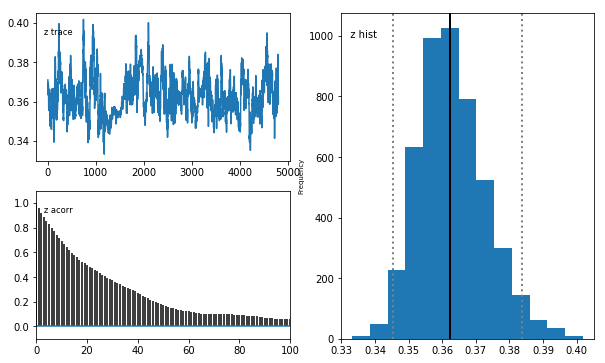

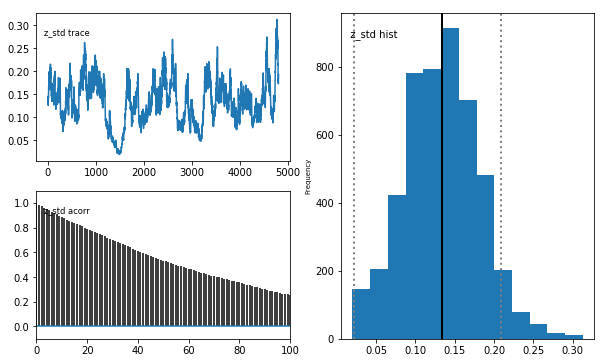

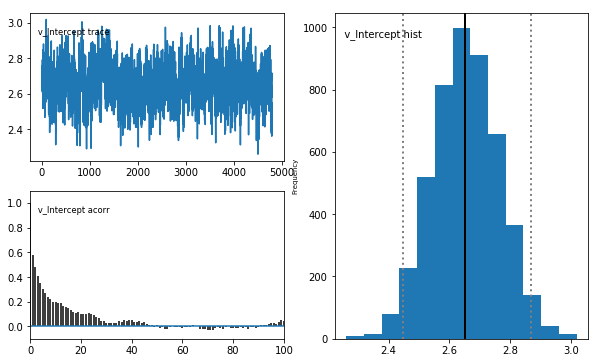

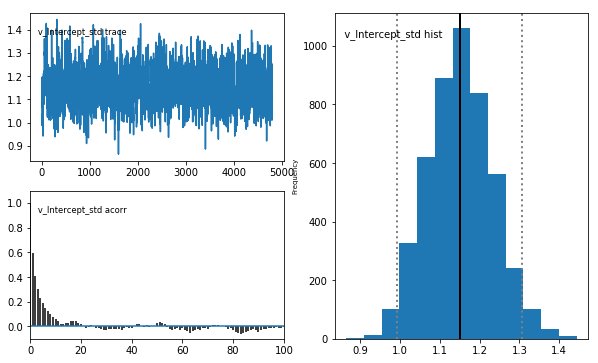

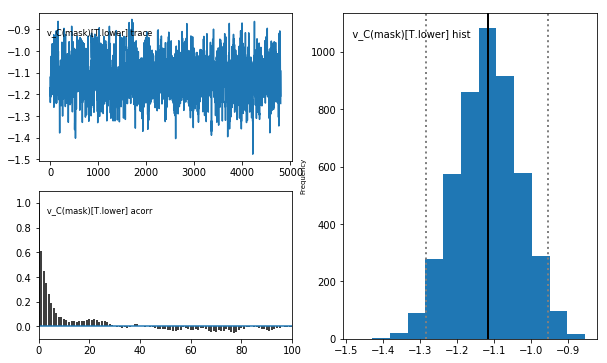

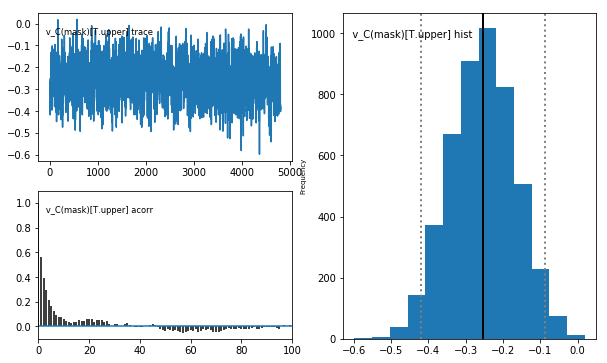

In [43]:
# save model stats
hh_stats = m_hh.gen_stats()
print(hh_stats)
# hh_stats.to_csv('_drift_maskFalseNegatives/hh_5000/faceMask2_hddm_drift_maskFalseNegatives_hh_5000.csv', index=True)

# save model posterior plots
# m_hh.plot_posteriors(path='_drift_maskFalseNegatives/hh_5000/_posteriors', save=True)

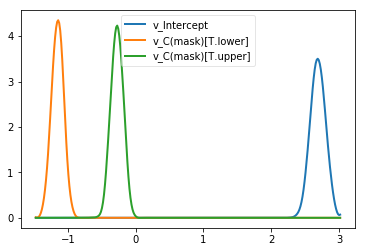

In [44]:
# plot model posteriors by mask
hh_v_none, hh_v_lower, hh_v_upper = m_hh.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([hh_v_none, hh_v_lower, hh_v_upper])
# plt.savefig('_drift_maskFalseNegatives/hh_5000/faceMask2_hddm_drift_maskFalseNegatives_hh_5000_v_mask.pdf')

In [46]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(hh_v_none < 0) = ", (hh_v_none.trace() < 0).mean())
print("P(hh_v_lower > 0) = ", (hh_v_lower.trace() > 0).mean())
print("P(hh_v_upper > 0) = ", (hh_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(hh_v_lower > hh_v_upper) = ", (hh_v_lower.trace() > hh_v_upper.trace()).mean())

P(hh_v_none < 0) =  0.0
P(hh_v_lower > 0) =  0.0
P(hh_v_upper > 0) =  0.000416666666667
P(hh_v_lower > hh_v_upper) =  0.0


In [47]:
## rating sad (sad faces)
# subset dataset by emotion rating type (sad) and facial expression (sad)
ss_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'sad')]
ss_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
111  lbmmswtrr0mpvov      2         1           sad    111   
112  lbmmswtrr0mpvov      2         1           sad    112   
120  lbmmswtrr0mpvov      2         1           sad    120   
126  lbmmswtrr0mpvov      2         1           sad    126   
140  lbmmswtrr0mpvov      2         1           sad    140   
148  lbmmswtrr0mpvov      2         1           sad    148   
156  lbmmswtrr0mpvov      2         1           sad    156   
157  lbmmswtrr0mpvov      2         1           sad    157   
160  lbmmswtrr0mpvov      2         1           sad    160   
538  mr81dhy9r5lxu8r      4         3           sad    219   

                stimulus      face model ethnicity sex expression      mask  \
111  _faces/WM13_S_X.jpg  WM13_S_X  WM13         W   M        sad  baseline   
112  _faces/WM13_S_U.jpg  WM13_S_U  WM13         W   M        sad     upper   
120  _faces/HF09_S_U.jpg  HF09_S_U  HF09         H   F        sad     upper   
126  _faces/HF09_S_L.jpg  HF09_S_L  HF09         H   F        sad     lower   
140  _faces/BF10_S_U.jpg  BF10_S_U  BF10         B   F        sad     upper   
148  _faces/HF09_S_X.jpg  HF09_S_X  HF09         H   F        sad  baseline   
156  _faces/WM13_S_L.jpg  WM13_S_L  WM13         W   M        sad     lower   
157  _faces/BF10_S_X.jpg  BF10_S_X  BF10         B   F        sad  baseline   
160  _faces/BF10_S_L.jpg  BF10_S_L  BF10         B   F        sad     lower   
538  _faces/WF05_S_L.jpg  WF05_S_L  WF05         W   F        sad     lower   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
111         1  0.804965          0              0            0          0   
112         1  0.732580          0              0            0          0   
120         0 -0.629785          0              0            0          0   
126         1  1.220135          0              0            0          0   
140         1  0.788105          0              0            0          0   
148         1  0.676440          0              0            0          0   
156         1  1.050590          0              0            0          0   
157         1  0.804625          0              0            0          0   
160         0 -1.750120          0              0            0          0   
538         0 -2.206000          0              0            0          0   

     faceSad  faceSurprised  
111      100              0  
112       50              0  
120       50              0  
126       50              0  
140       50              0  
148      100              0  
156       50              0  
157      100              0  
160       50              0  
538       50              0

In [49]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ss_data = ss_data[(ss_data.subj_idx != 'dqph4ch0mkofejw') & (ss_data.subj_idx != 'hdn2l3df216jykn') & (ss_data.subj_idx != 'me8doxrmo9vj9dx') & (ss_data.subj_idx != 'n1w02b847xslowd')]

In [50]:
# define model
m_ss = hddm.HDDMRegressor(ss_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 45463.5 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q        50q        75q      97.5q       mc err
a                                   1.57932  0.0351801    1.51073    1.55539    1.57908    1.60255    1.64949   0.00105518
a_std                              0.447538  0.0328029   0.385953   0.424879   0.446514   0.469135   0.514619   0.00132639
a_subj.09coqg8hlpux6fe              1.28202    0.30403   0.799054    1.05871    1.24644    1.47166    1.97762    0.0109084
a_subj.0b3t2skj9mlhbkn              1.44188   0.239082    1.04573    1.27022    1.41605    1.59178    1.98066   0.00544043
a_subj.0bcg7mtj2n1jjw9              2.45901    0.45972    1.71683    2.13326    2.40346     2.7319    3.50106     0.013098
a_subj.0s53r30oouek89b               2.4005   0.458798    1.64461    2.07586    2.34469    2.68045    3.44019    0.0137188
a_subj.0uj9gbhag3o1w1v               1.9981   0.301837     1.4827    1.78544    1.97339    2.18298    2.64792   0.00617165
a_subj.17nzn4k8r

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


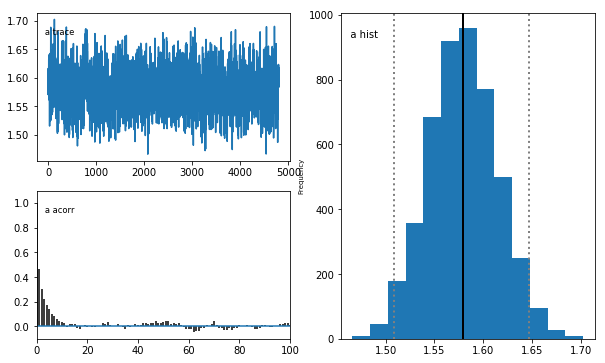

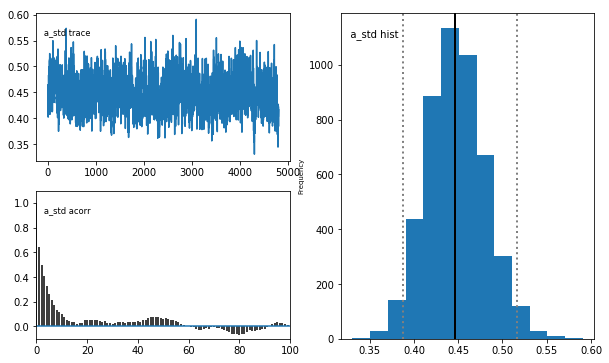

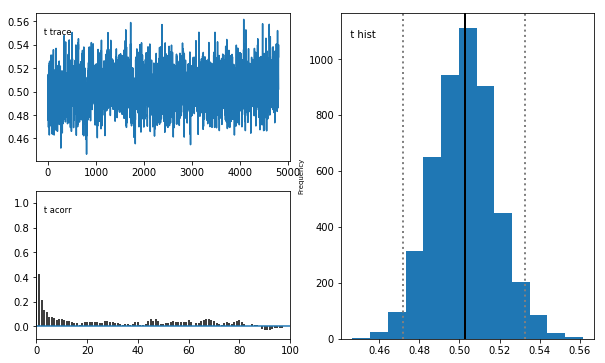

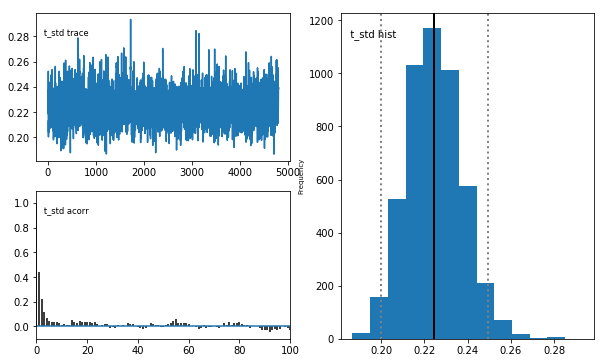

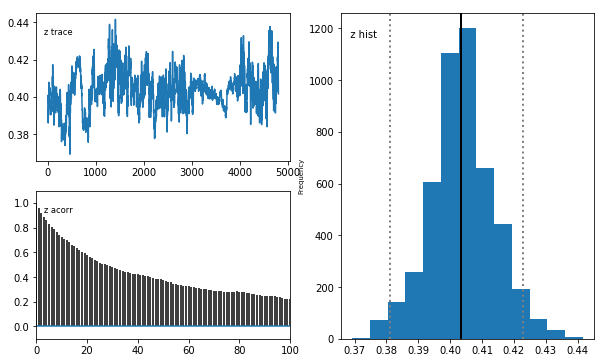

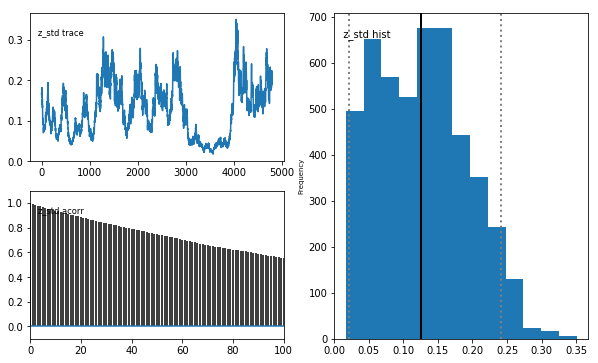

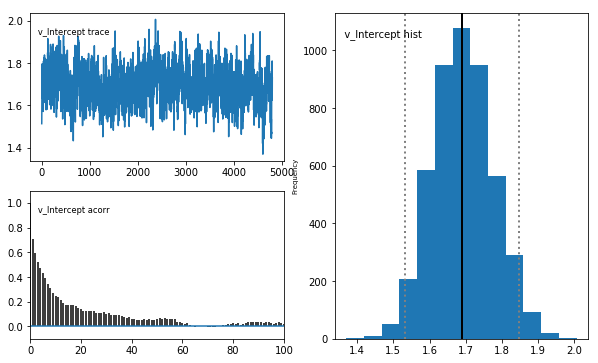

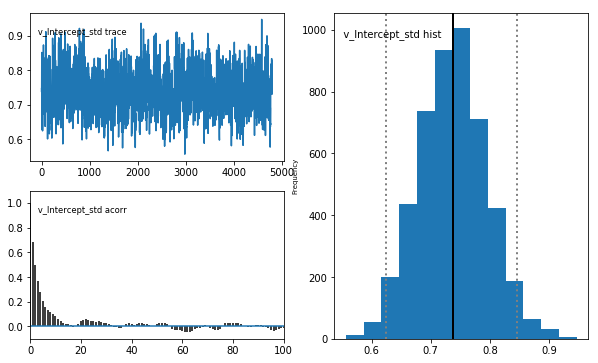

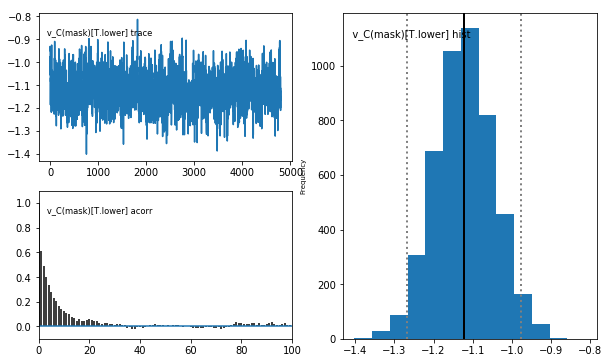

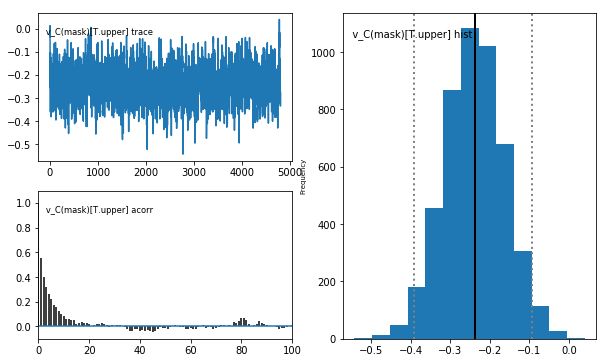

In [51]:
# run model
m_ss.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ss.print_stats()
m_ss.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std      2.5q       25q  \
a                                  1.57932  0.0351801   1.51073   1.55539   
a_std                             0.447538  0.0328029  0.385953  0.424879   
a_subj.09coqg8hlpux6fe             1.28202    0.30403  0.799054   1.05871   
a_subj.0b3t2skj9mlhbkn             1.44188   0.239082   1.04573   1.27022   
a_subj.0bcg7mtj2n1jjw9             2.45901    0.45972   1.71683   2.13326   
a_subj.0s53r30oouek89b              2.4005   0.458798   1.64461   2.07586   
a_subj.0uj9gbhag3o1w1v              1.9981   0.301837    1.4827   1.78544   
a_subj.17nzn4k8r1qkmrn              1.4729   0.222963   1.08703   1.31453   
a_subj.1fdkw2qjx3hc3lk             1.28547   0.238069  0.891513   1.11507   
a_subj.1mla0dmotqefnav             1.55694   0.238424   1.15946   1.39023   
a_subj.23hr9tl84h3zhw3             1.63424   0.251072   1.21272   1.45803   
a_subj.27muqwvalwne26r             2.33885   0.344033   1.75064   2.10117   

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


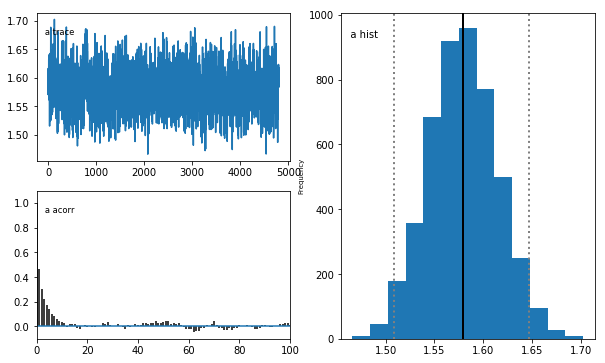

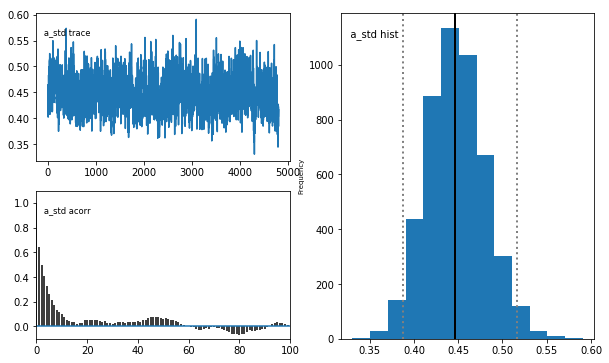

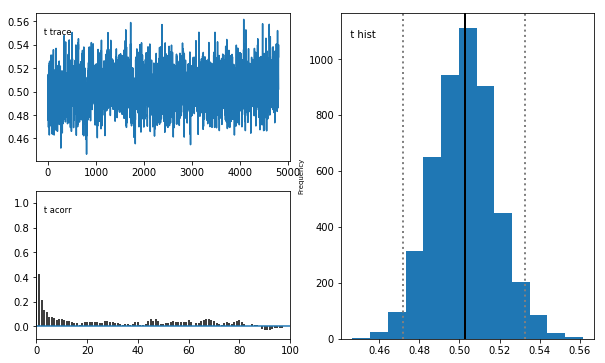

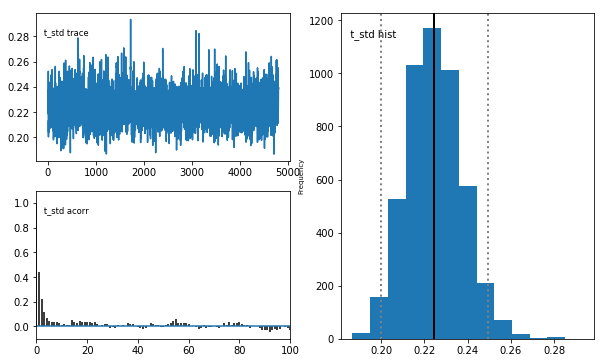

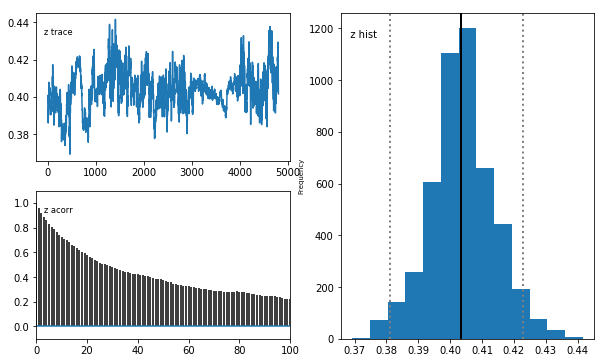

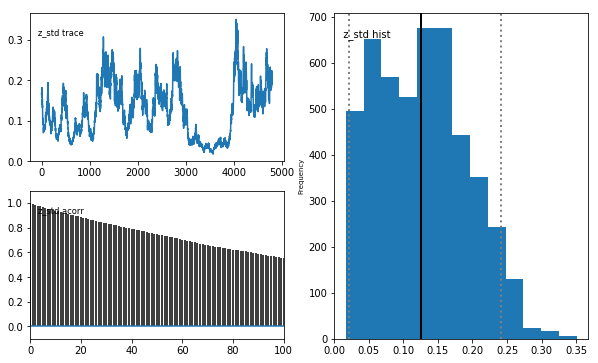

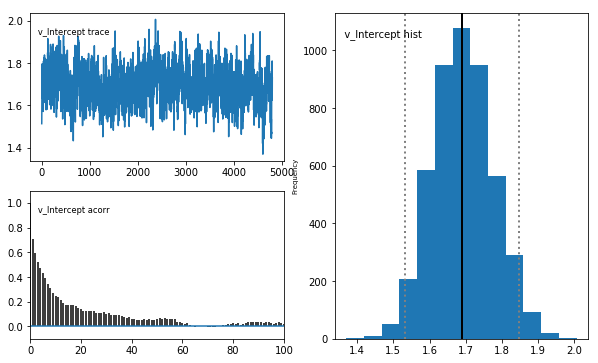

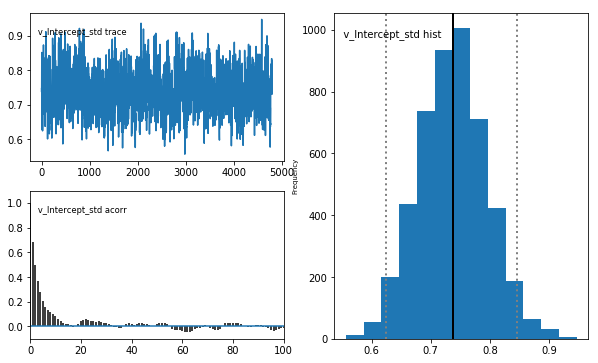

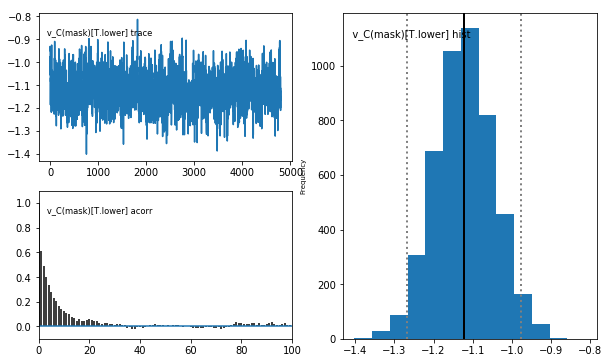

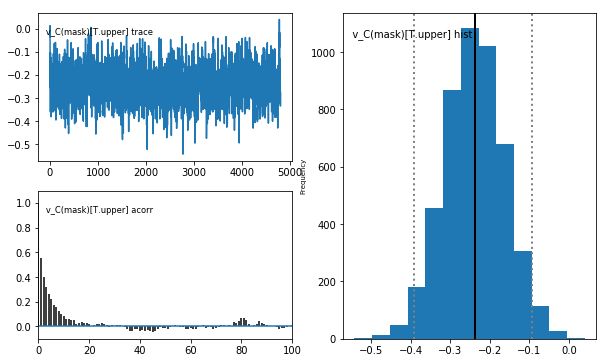

In [52]:
# save model stats
ss_stats = m_ss.gen_stats()
print(ss_stats)
# ss_stats.to_csv('_drift_maskFalseNegatives/ss_5000/faceMask2_hddm_drift_maskFalseNegatives_ss_5000.csv', index=True)

# save model posterior plots
# m_ss.plot_posteriors(path='_drift_maskFalseNegatives/ss_5000/_posteriors', save=True)

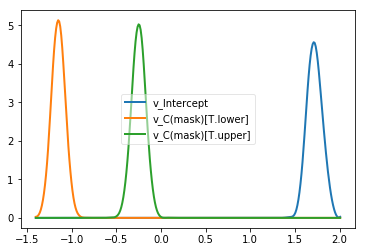

In [53]:
# plot model posteriors by mask
ss_v_none, ss_v_lower, ss_v_upper = m_ss.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ss_v_none, ss_v_lower, ss_v_upper])
# plt.savefig('_drift_maskFalseNegatives/ss_5000/faceMask2_hddm_drift_maskFalseNegatives_ss_5000_v_mask.pdf')

In [54]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ss_v_none < 0) = ", (ss_v_none.trace() < 0).mean())
print("P(ss_v_lower > 0) = ", (ss_v_lower.trace() > 0).mean())
print("P(ss_v_upper > 0) = ", (ss_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ss_v_lower > ss_v_upper) = ", (ss_v_lower.trace() > ss_v_upper.trace()).mean())

P(ss_v_none < 0) =  0.0
P(ss_v_lower > 0) =  0.0
P(ss_v_upper > 0) =  0.000625
P(ss_v_lower > ss_v_upper) =  0.0


In [4]:
## rating surprised (surprised faces)
# subset dataset by emotion rating type (surprised) and facial expression (surprised)
rr_data = data.loc[(data['emotionRating'] == 'surprised') & (data['expression'] == 'surprised')]
rr_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
1    lbmmswtrr0mpvov      0         3     surprised      1   
3    lbmmswtrr0mpvov      0         3     surprised      3   
13   lbmmswtrr0mpvov      0         3     surprised     13   
18   lbmmswtrr0mpvov      0         3     surprised     18   
31   lbmmswtrr0mpvov      0         3     surprised     31   
36   lbmmswtrr0mpvov      0         3     surprised     36   
44   lbmmswtrr0mpvov      0         3     surprised     44   
45   lbmmswtrr0mpvov      0         3     surprised     45   
51   lbmmswtrr0mpvov      0         3     surprised     51   
589  mr81dhy9r5lxu8r      5         2     surprised    270   

                stimulus      face model ethnicity sex expression      mask  \
1    _faces/BM17_R_X.jpg  BM17_R_X  BM17         B   M  surprised  baseline   
3    _faces/BM17_R_L.jpg  BM17_R_L  BM17         B   M  surprised     lower   
13   _faces/AM04_R_L.jpg  AM04_R_L  AM04         A   M  surprised     lower   
18   _faces/WF02_R_X.jpg  WF02_R_X  WF02         W   F  surprised  baseline   
31   _faces/AM04_R_X.jpg  AM04_R_X  AM04         A   M  surprised  baseline   
36   _faces/WF02_R_U.jpg  WF02_R_U  WF02         W   F  surprised     upper   
44   _faces/WF02_R_L.jpg  WF02_R_L  WF02         W   F  surprised     lower   
45   _faces/AM04_R_U.jpg  AM04_R_U  AM04         A   M  surprised     upper   
51   _faces/BM17_R_U.jpg  BM17_R_U  BM17         B   M  surprised     upper   
589  _faces/AM07_R_U.jpg  AM07_R_U  AM07         A   M  surprised     upper   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
1           1  1.122130          0              0            0          0   
3           1  1.347000          0              0            0          0   
13          0 -1.250875          0              0            0          0   
18          1  0.676070          0              0            0          0   
31          1  1.268375          0              0            0          0   
36          1  0.908140          0              0            0          0   
44          1  0.850425          0              0            0          0   
45          1  0.876780          0              0            0          0   
51          0 -0.725275          0              0            0          0   
589         1  1.807000          0              0            0          0   

     faceSad  faceSurprised  
1          0            100  
3          0             50  
13         0             50  
18         0            100  
31         0            100  
36         0             50  
44         0             50  
45         0             50  
51         0             50  
589        0             50

In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
rr_data = rr_data[(rr_data.subj_idx != 'dqph4ch0mkofejw') & (rr_data.subj_idx != 'me8doxrmo9vj9dx') & (rr_data.subj_idx != 'xs5439nm2v85thb')]

In [6]:
# define model
m_rr = hddm.HDDMRegressor(rr_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 43880.1 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std        2.5q        25q         50q        75q     97.5q       mc err
a                                    1.54546   0.0336227     1.48048    1.52247     1.54545    1.56823   1.61225   0.00130887
a_std                                0.39804   0.0302066    0.343305   0.376928    0.396683   0.418288  0.459127   0.00141486
a_subj.09coqg8hlpux6fe               1.11162    0.193458    0.792396   0.972402     1.09549    1.23137    1.5354   0.00504494
a_subj.0b3t2skj9mlhbkn                1.3536    0.213451     0.99104    1.20272     1.33279    1.48418   1.82426   0.00497773
a_subj.0bcg7mtj2n1jjw9               2.53082    0.377011     1.88576    2.26249      2.5025    2.76344   3.36741   0.00934362
a_subj.0s53r30oouek89b               1.87462    0.294011     1.38286    1.66531     1.84922    2.05325   2.52892   0.00675308
a_subj.0uj9gbhag3o1w1v               1.29541    0.258172    0.885869    1.10763     1.27026    1.44456   1.89703   0.0

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


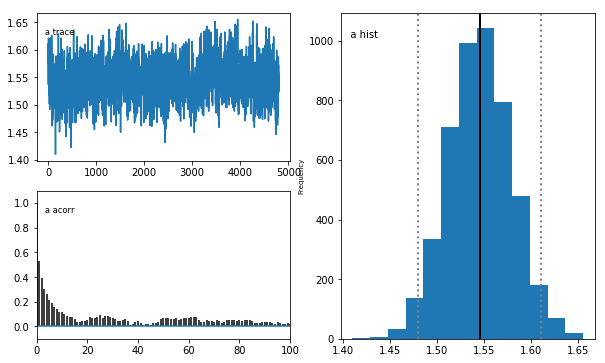

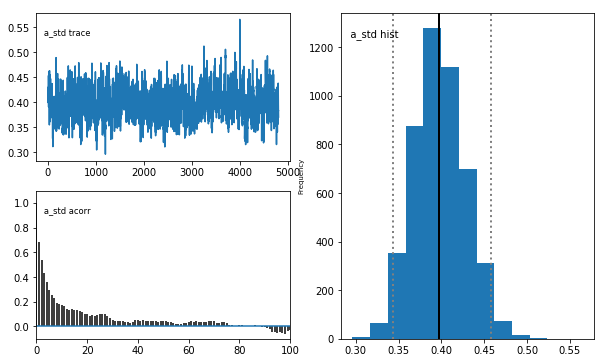

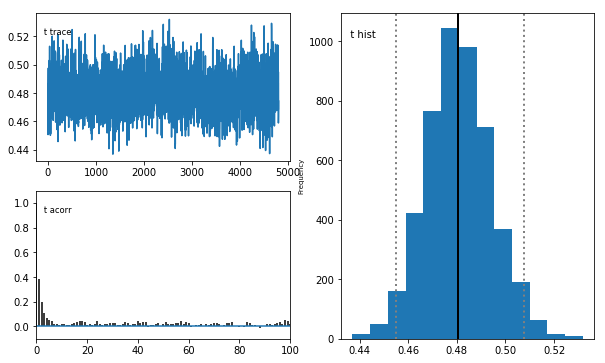

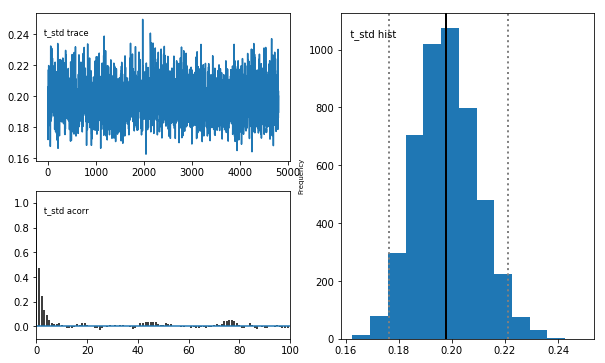

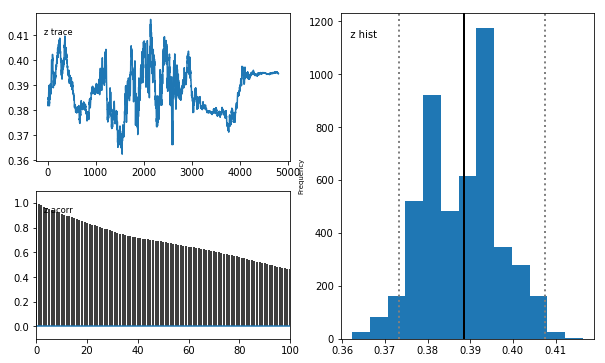

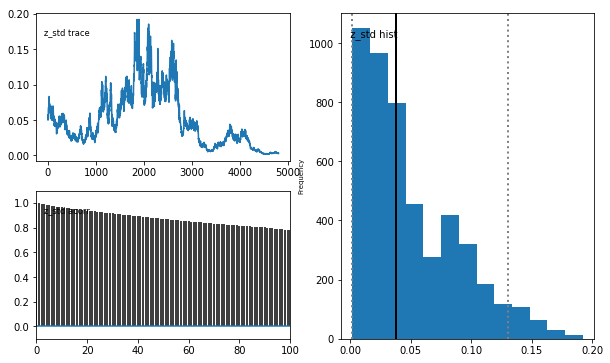

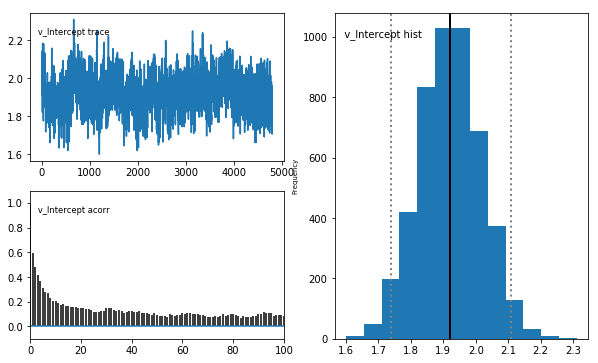

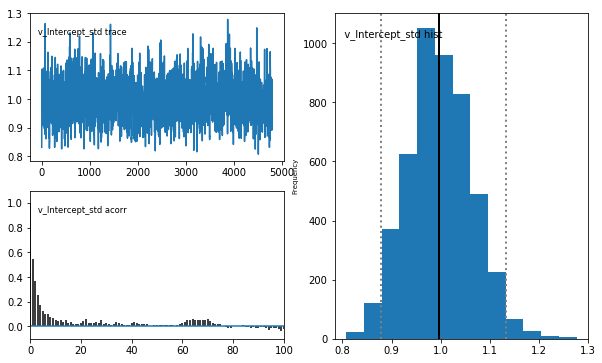

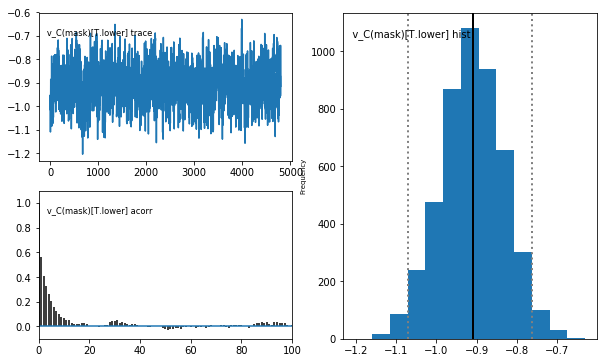

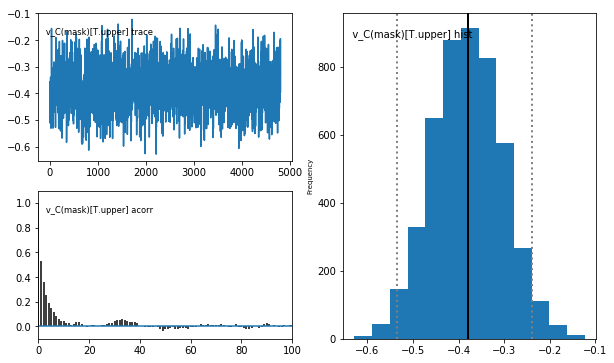

In [7]:
# run model
m_rr.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_rr.print_stats()
m_rr.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std       2.5q       25q  \
a                                  1.54546  0.0336227    1.48048   1.52247   
a_std                              0.39804  0.0302066   0.343305  0.376928   
a_subj.09coqg8hlpux6fe             1.11162   0.193458   0.792396  0.972402   
a_subj.0b3t2skj9mlhbkn              1.3536   0.213451    0.99104   1.20272   
a_subj.0bcg7mtj2n1jjw9             2.53082   0.377011    1.88576   2.26249   
a_subj.0s53r30oouek89b             1.87462   0.294011    1.38286   1.66531   
a_subj.0uj9gbhag3o1w1v             1.29541   0.258172   0.885869   1.10763   
a_subj.17nzn4k8r1qkmrn             1.68401   0.243716    1.26633   1.50979   
a_subj.1fdkw2qjx3hc3lk              1.3624   0.231751   0.979793   1.19634   
a_subj.1mla0dmotqefnav             1.70874   0.333983    1.14804    1.4729   
a_subj.23hr9tl84h3zhw3              1.6272   0.306136    1.10638   1.41019   
a_subj.27muqwvalwne26r             1.82784   0.227717    1.42252

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


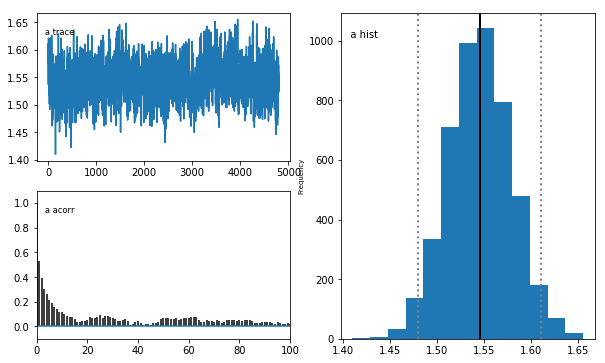

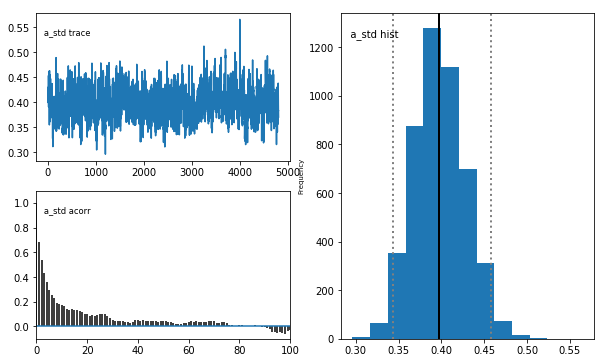

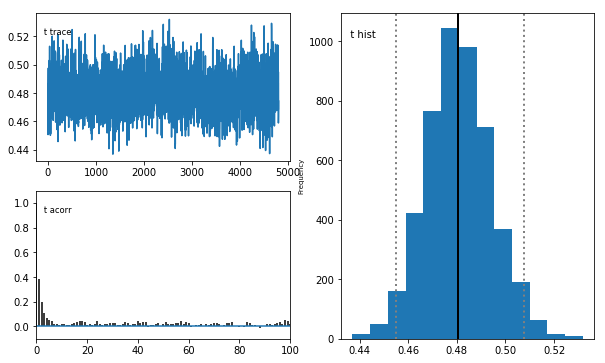

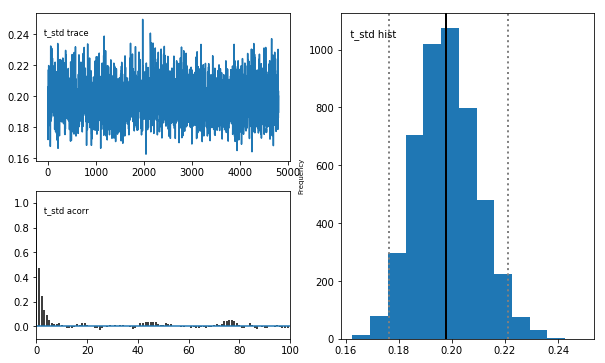

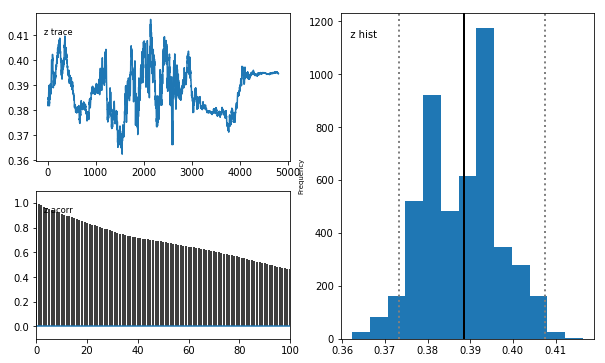

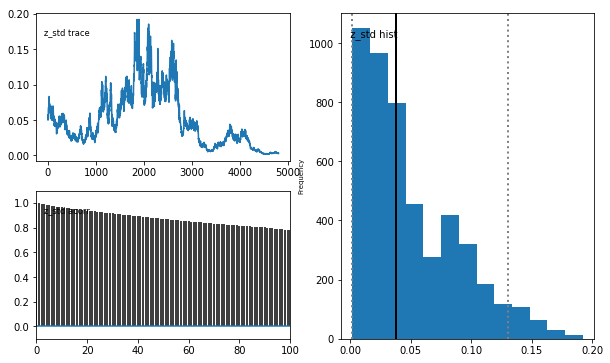

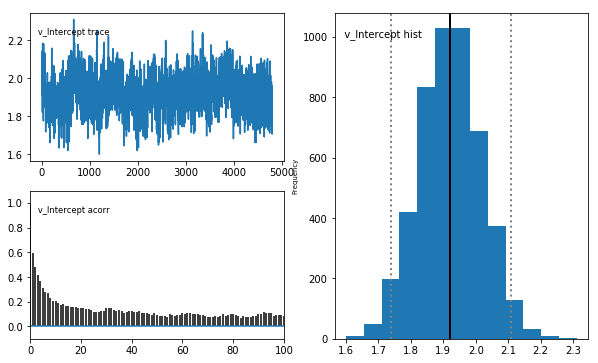

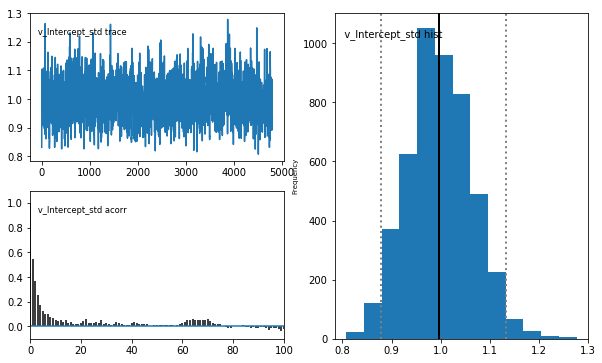

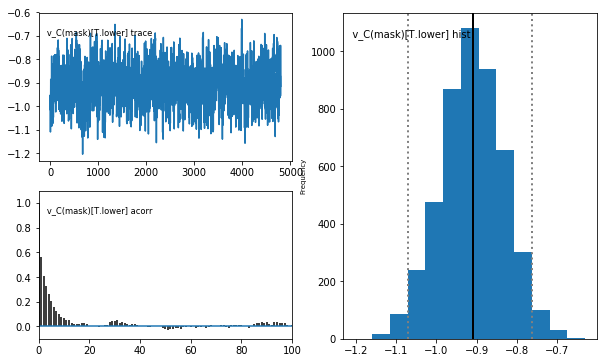

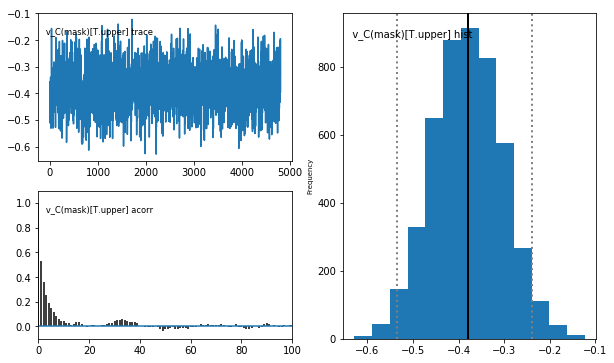

In [8]:
# save model stats
rr_stats = m_rr.gen_stats()
print(rr_stats)
# rr_stats.to_csv('_drift_maskFalseNegatives/rr_5000/faceMask2_hddm_drift_maskFalseNegatives_rr_5000.csv', index=True)

# save model posterior plots
# m_rr.plot_posteriors(path='_drift_maskFalseNegatives/rr_5000/_posteriors', save=True)

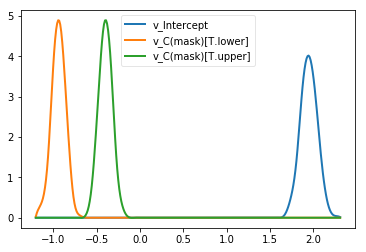

In [9]:
# plot model posteriors by mask
rr_v_none, rr_v_lower, rr_v_upper = m_rr.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([rr_v_none, rr_v_lower, rr_v_upper])
# plt.savefig('_drift_maskFalseNegatives/rr_5000/faceMask2_hddm_drift_maskFalseNegatives_rr_5000_v_mask.pdf')

In [10]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(rr_v_none < 0) = ", (rr_v_none.trace() < 0).mean())
print("P(rr_v_lower > 0) = ", (rr_v_lower.trace() > 0).mean())
print("P(rr_v_upper > 0) = ", (rr_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(rr_v_lower > rr_v_upper) = ", (rr_v_lower.trace() > rr_v_upper.trace()).mean())

P(rr_v_none < 0) =  0.0
P(rr_v_lower > 0) =  0.0
P(rr_v_upper > 0) =  0.0
P(rr_v_lower > rr_v_upper) =  0.0
